In [1]:
import numpy as np

In [2]:
import pertpy as pt

/home/kvalem/.conda/envs/pertpy-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/kvalem/.conda/envs/pertpy-env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/kvalem/.conda/envs/pertpy-env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/kvalem/.conda/envs/pertpy-env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/kvalem/.conda/envs/pertpy-env/lib/python3.10/site-p

In [3]:
import scanpy as sc

In [4]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import mudata as mu

In [5]:
import sccoda.util.cell_composition_data as scc_dat
import sccoda.util.comp_ana as scc_ana
import sccoda.util.data_visualization as scc_viz

In [6]:
import altair as alt

In [7]:
import pandas as pd

In [8]:
import tensorflow as tf

In [9]:
tf.random.set_seed(0)

In [10]:
sc.settings.set_figure_params(
    dpi=200,
    facecolor="white",
    frameon=False,
)

In [11]:
path = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/pseudobulk/"
resDir = "/data/projects/2023/LCBiome/nsclc_gender_atlas_tmp/out/011_analysis_paired_remove_xy/figures/"
input_path = f"{path}/paired_adata_clean.h5ad"

In [12]:
adata = sc.read_h5ad(input_path) 

In [219]:
adata

AnnData object with n_obs × n_vars = 465474 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
    var: 'is_highly_variable', 'mito', 

## There are malignant cells in normal_adjacent samples
Comming from 59 different patients and 14 datasets
I cannot give an explanation for this so i remove this "mislalbeled" cells 

In [14]:
grouped = adata.obs.groupby(['cell_type', 'origin']).size().reset_index(name='cell_count')

In [15]:
grouped

cell_type           origin  cell_count
0     epithelial cell  normal_adjacent        5532
1     epithelial cell    tumor_primary       17420
2          macrophage  normal_adjacent       82361
3          macrophage    tumor_primary       48086
4              B cell  normal_adjacent        4121
5              B cell    tumor_primary       23779
6      dendritic cell  normal_adjacent         446
7      dendritic cell    tumor_primary         712
8         CD4+ T cell  normal_adjacent       57758
9         CD4+ T cell    tumor_primary       62899
10        CD8+ T cell  normal_adjacent       43273
11        CD8+ T cell    tumor_primary       55399
12         neutrophil  normal_adjacent        6399
13         neutrophil    tumor_primary        8845
14  regulatory T cell  normal_adjacent        4090
15  regulatory T cell    tumor_primary       19321
16     malignant cell  normal_adjacent         760
17     malignant cell    tumor_primary       25033

In [16]:
# Create a Boolean mask for the cells that you want to keep
mask = ~((adata.obs['origin'] == 'normal_adjacent') & (adata.obs['cell_type'] == 'malignant cell'))

# Subset the adata object using the mask to exclude the specific cells
adata = adata[mask].copy()

# Now `adata_filtered` contains all cells except those with origin == 'normal_adjacent' and cell_type == 'malignant cell'


In [17]:
grouped = adata.obs.groupby(['cell_type', 'origin']).size().reset_index(name='cell_count')
grouped

cell_type           origin  cell_count
0     epithelial cell  normal_adjacent        5532
1     epithelial cell    tumor_primary       17420
2          macrophage  normal_adjacent       82361
3          macrophage    tumor_primary       48086
4              B cell  normal_adjacent        4121
5              B cell    tumor_primary       23779
6      dendritic cell  normal_adjacent         446
7      dendritic cell    tumor_primary         712
8         CD4+ T cell  normal_adjacent       57758
9         CD4+ T cell    tumor_primary       62899
10        CD8+ T cell  normal_adjacent       43273
11        CD8+ T cell    tumor_primary       55399
12         neutrophil  normal_adjacent        6399
13         neutrophil    tumor_primary        8845
14  regulatory T cell  normal_adjacent        4090
15  regulatory T cell    tumor_primary       19321
16     malignant cell  normal_adjacent           0
17     malignant cell    tumor_primary       25033

In [18]:
adata_normal = adata[adata.obs["origin"]=="normal_adjacent"]
#adata_normal = adata_normal[~adata_normal.obs["cell_type"].isin(["malignant cell"])]

In [19]:
set(adata_normal.obs.cell_type)

{'B cell',
 'CD4+ T cell',
 'CD8+ T cell',
 'dendritic cell',
 'epithelial cell',
 'macrophage',
 'neutrophil',
 'regulatory T cell'}

In [20]:
adata_tumor = adata[adata.obs["origin"]=="tumor_primary"]

In [21]:
set(adata_normal.obs.cell_type)

{'B cell',
 'CD4+ T cell',
 'CD8+ T cell',
 'dendritic cell',
 'epithelial cell',
 'macrophage',
 'neutrophil',
 'regulatory T cell'}

In [22]:
adata_normal = adata[adata.obs["origin"]=="normal_adjacent"]
#adata_normal = adata_normal[~adata_normal.obs["cell_type"].isin(["malignant cell"])]

In [23]:
adata_tumor = adata[adata.obs["origin"]=="tumor_primary"]

In [24]:
adata

AnnData object with n_obs × n_vars = 465474 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_counts',

In [25]:
adata_luad = adata[adata.obs["disease"]=="lung adenocarcinoma"]

In [26]:
adata_luad

View of AnnData object with n_obs × n_vars = 349492 × 17811
    obs: 'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'is_highly_variable', 'mito', 'n_cells_by_

In [27]:
adata_luad_tumor = adata_luad[adata_luad.obs["origin"]=="tumor_primary"]

# Male & Female Tumor vs Normal 

In [171]:
# Convert data to mudata object
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata_luad,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["age","sex","dataset","origin","disease"],
)

# Select control and salmonella data as one modality
sccoda_data.mod["coda_sex"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["sex"].isin(["male", "female"])
].copy()
print(sccoda_data)



MuData object with n_obs × n_vars = 349668 × 17820
  3 modalities
    rna:	349492 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'

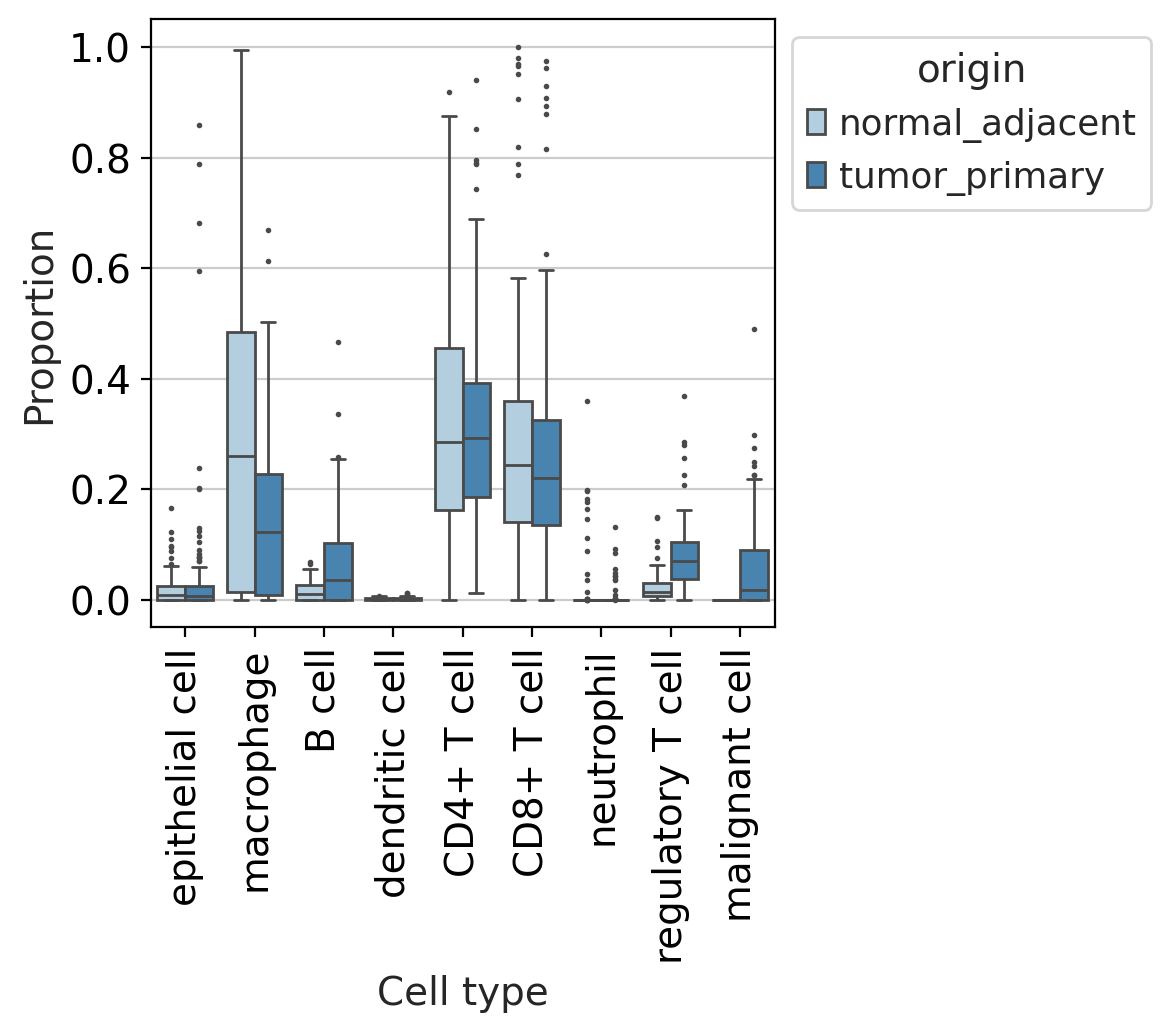

In [172]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_sex", feature_name="origin", add_dots=False)
plt.show()

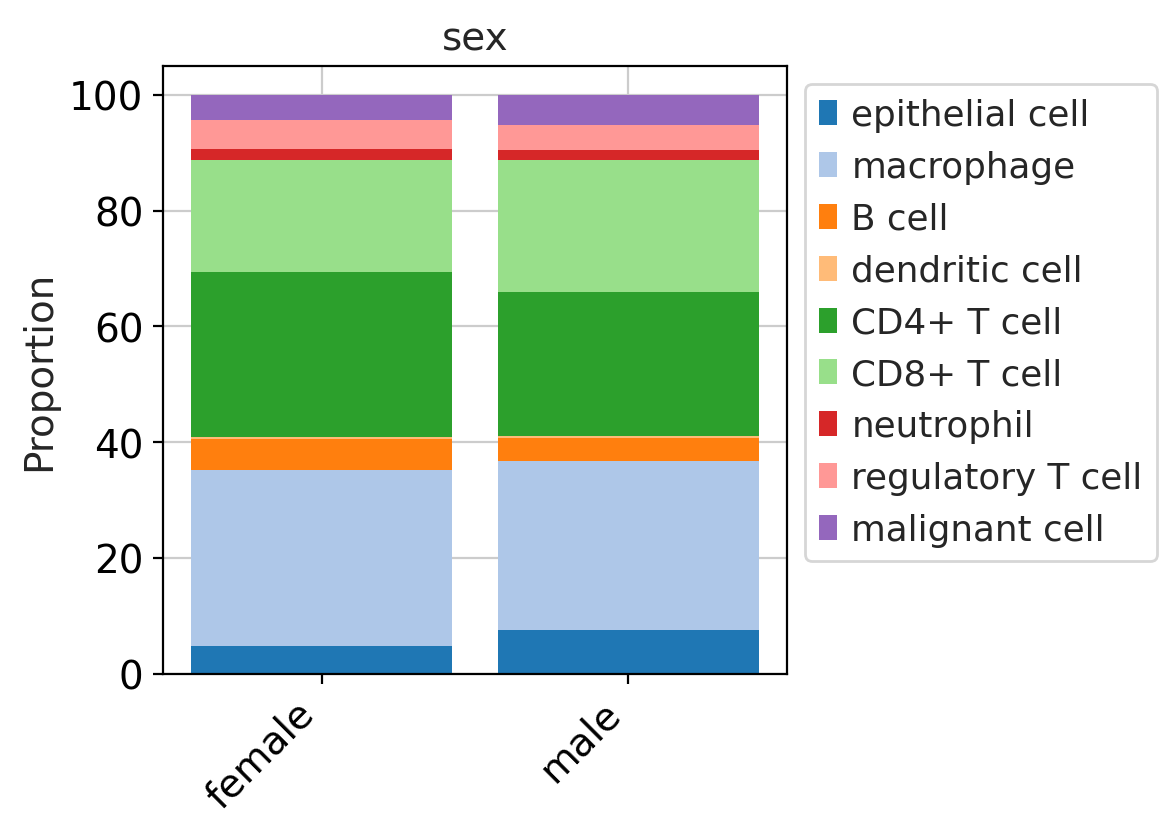

In [75]:
fig = sccoda_model.plot_stacked_barplot(
    sccoda_data,
    modality_key="coda_sex",
    feature_name="sex"

)

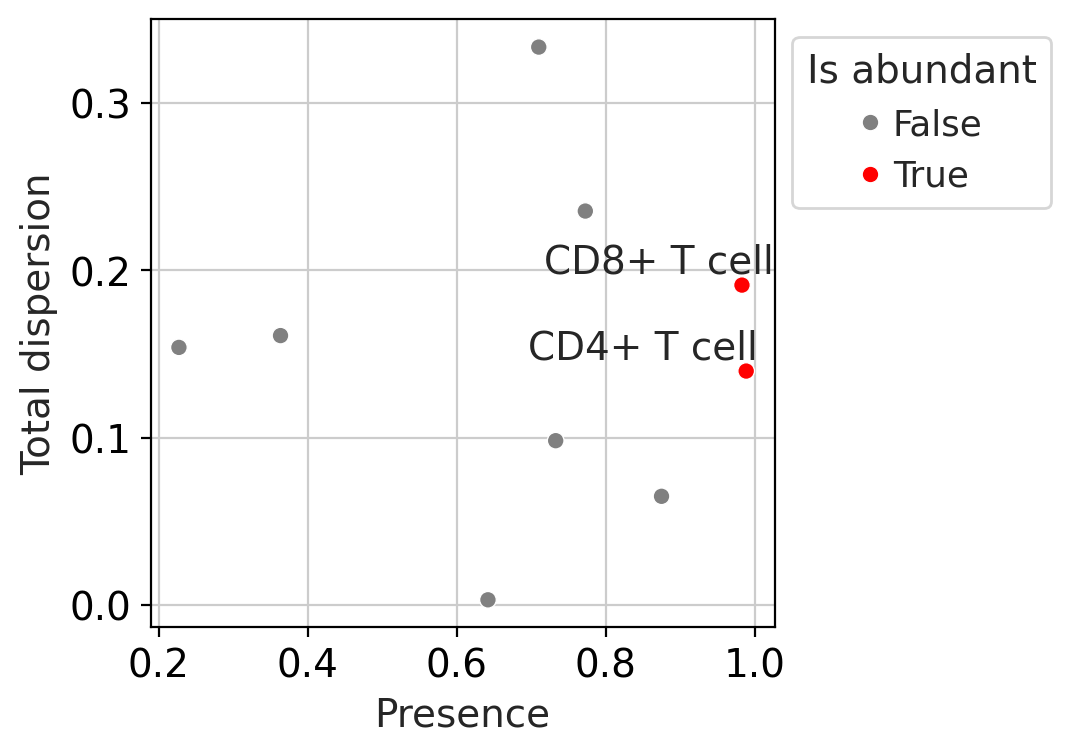

In [76]:
sccoda_model.plot_rel_abundance_dispersion_plot(sccoda_data, modality_key="coda_sex", abundant_threshold=0.9)

In [77]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda_sex",
    formula = "sex + origin",
    reference_cell_type="automatic",
    automatic_reference_absence_threshold=1
)
sccoda_data["coda_sex"]

• Automatic reference selection! Reference cell type set to dendritic cell
• Zero counts encountered in data! Added a pseudocount of 0.5.


AnnData object with n_obs × n_vars = 176 × 9
    obs: 'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

In [78]:
sccoda_data

MuData object with n_obs × n_vars = 349668 × 17820
  3 modalities
    rna:	349492 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	176 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
    coda_sex:	176 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'

In [79]:
# Run MCMC
sccoda_model.run_nuts(sccoda_data, modality_key="coda_sex")
sccoda_data["coda_sex"]

sample: 100%|██████████| 11000/11000 [13:46<00:00, 13.31it/s, 255 steps of size 1.58e-02. acc. prob=0.85]


AnnData object with n_obs × n_vars = 176 × 9
    obs: 'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_sex[T.male]', 'effect_df_origin[T.tumor_primary]'

In [80]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda_sex", est_fdr=0.1)


In [81]:
sccoda_model.summary(sccoda_data, modality_key="coda_sex")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 176 samples, 9 cell types                                    │
│ Reference cell type                        │ dendritic cell                                                     │
│ Formula                                    │ sex + origin                                                       │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ epithelial cell        -0.980          111.782                                                                  │
│ macrophage              0.211          367.805                                                                  │
│ B cell                 -0.947          115.533                                                                  │
│ dendritic cell         -1.442           70.425                                                                  │
│ CD4+ T cell             0.681          588.486                                                                  │
│ CD8+ T cell             0.512          496.981                                                                  │
│ neutrophil             -1.603           59.953                                                                  │
│ regulatory T cell      -0.865          125.406                                                                  │
│ malignant cell         -1.770           50.732                                                                  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          Final Parameter  Expected Sample  log2-fold change                     │
│ Covariate             Cell Type                                                                                 │
│ sexT.male             epithelial cell         0.000          106.113            -0.075                          │
│                       macrophage              0.000          349.151            -0.075                          │
│                       B cell                  0.000          109.673            -0.075                          │
│                       dendritic cell          0.000           66.854            -0.075                          │
│                       CD4+ T cell             0.000          558.640            -0.075                          │
│                       CD8+ T cell             0.194          572.555             0.204                          │
│                       neutrophil              0.000           56.912            -0.075                          │
│                       regulatory T cell       0.000          119.045            -0.075                          │
│                       malignant cell          0.000           48.159            -0.075                          │
│ originT.tumor_primary epithelial cell         0.000          106.058            -0.076                          │
│                       macrophage             -0.404          233.091            -0.658                          │
│                       B cell                  0.387          161.487             0.483                          │
│                       dendritic cell          0.000           66.819            -0.076                          │
│                       CD4+ T cell             0.000          558.352            -0.076                          │
│                       CD8+ T cell             0.000          471.533            -0.076                          │
│                       neutrophil              0.000           56.883            -0.076                          │
│                       regulatory T cell       0.562          208.698             0.735                          │
│                       malignant cell          0.948          124.181             1.291                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [82]:
sccoda_model.summary(sccoda_data, modality_key="coda_sex", extended=True)

                                          Compositional Analysis summary                                           
┌───────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────┐
│ Name                                  │ Value                                                                   │
├───────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Data                                  │ Data: 176 samples, 9 cell types                                         │
│ Reference cell type                   │ dendritic cell                                                          │
│ Formula                               │ sex + origin                                                            │
│ Reference index                       │ 3                                                                       │
│ Spike-and-slab threshold              │ 0.768                                                                   │
│ Spike-and-slab threshold              │ 0.768                                                                   │
│ MCMC Sampling                         │ Sampled 10000 chain states (1000 burnin samples)                        │
│ Acceptance rate                       │ 84.9%                                                                   │
└───────────────────────────────────────┴─────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  HDI 3%  HDI 97%   SD   Expected Sample                                      │
│ Cell Type                                                                                                       │
│ epithelial cell        -0.980       -1.155  -0.804  0.092     111.782                                           │
│ macrophage              0.211       -0.031   0.427  0.123     367.805                                           │
│ B cell                 -0.947       -1.156  -0.695  0.122     115.533                                           │
│ dendritic cell         -1.442       -1.586  -1.306  0.075      70.425                                           │
│ CD4+ T cell             0.681        0.510   0.847  0.089     588.486                                           │
│ CD8+ T cell             0.512        0.349   0.679  0.089     496.981                                           │
│ neutrophil             -1.603       -1.778  -1.432  0.091      59.953                                           │
│ regulatory T cell      -0.865       -1.074  -0.667  0.108     125.406                                           │
│ malignant cell         -1.770       -1.976  -1.547  0.115      50.732                                           │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          Final Parameter  Expected Sample  log2-fold change                     │
│ Covariate             Cell Type                                                                                 │
│ sexT.male             epithelial cell         0.000          106.113            -0.075                          │
│                       macrophage              0.000          349.151            -0.075                          │
│                       B cell                  0.000          109.673            -0.075                          │
│                       dendritic cell          0.000           66.854            -0.075                          │
│                       CD4+ T cell             0.000          558.640            -0.075                          │
│                       CD8+ T cell             0.194          572.555             0.204                          │
│                       neutrophil              0.000           56.912            -0.075                          │
│                       regulatory T cell       0.000          119.045            -0.075                          │
│                       malignant cell          0.000           48.159            -0.075                          │
│ originT.tumor_primary epithelial cell         0.000          106.058            -0.076                          │
│                       macrophage             -0.404          233.091            -0.658                          │
│                       B cell                  0.387          161.487             0.483                          │
│                       dendritic cell          0.000           66.819            -0.076                          │
│                       CD4+ T cell             0.000          558.352            -0.076                          │
│                       CD8+ T cell             0.000          471.533            -0.076                          │
│                       neutrophil              0.000           56.883            -0.076                          │
│                       regulatory T cell       0.562          208.698             0.735                          │
│                       malignant cell          0.948          124.181             1.291                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects Extended                                                                                                │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          HDI 3%  HDI 97%   SD   Inclusion probability                           │
│ Covariate             Cell Type                                                                                 │
│ sexT.male             epithelial cell    -0.276   0.138  0.081         0.452                                    │
│                       macrophage         -0.060   0.421  0.138         0.642                                    │
│                       B cell             -0.165   0.234  0.067         0.406                                    │
│                       dendritic cell      0.000   0.000  0.000         0.000                                    │
│                       CD4+ T cell        -0.125   0.257  0.073         0.428                                    │
│                       CD8+ T cell        -0.024   0.428  0.141         0.768                                    │
│                       neutrophil         -0.260   0.154  0.074         0.432                                    │
│                       regulatory T cell  -0.151   0.232  0.066         0.407                                    │
│                       malignant cell     -0.185   0.214  0.067         0.414                                    │
│ originT.tumor_primary epithelial cell    -0.184   0.319  0.071         0.268                                    │
│                       macrophage         -0.661  -0.105  0.160         0.953                                    │
│                       B cell              0.074   0.669  0.181         0.909                                    │
│                       dendritic cell      0.000   0.000  0.000         0.000                                    │
│                       CD4+ T cell        -0.066   0.349  0.097         0.364                                    │
│                       CD8+ T cell        -0.205   0.206  0.050         0.214                                    │
│                       neutrophil         -0.275   0.224  0.068         0.253                                    │
│                       regulatory T cell   0.274   0.841  0.139         1.000                                    │
│                       malignant cell      0.645   1.223  0.153         1.000                                    │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [83]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda_sex")

Covariate                Cell Type        
sex[T.male]              epithelial cell      False
                         macrophage           False
                         B cell               False
                         dendritic cell       False
                         CD4+ T cell          False
                         CD8+ T cell           True
                         neutrophil           False
                         regulatory T cell    False
                         malignant cell       False
origin[T.tumor_primary]  epithelial cell      False
                         macrophage            True
                         B cell                True
                         dendritic cell       False
                         CD4+ T cell          False
                         CD8+ T cell          False
                         neutrophil           False
                         regulatory T cell     True
                         malignant cell        True
Name: Final Parameter

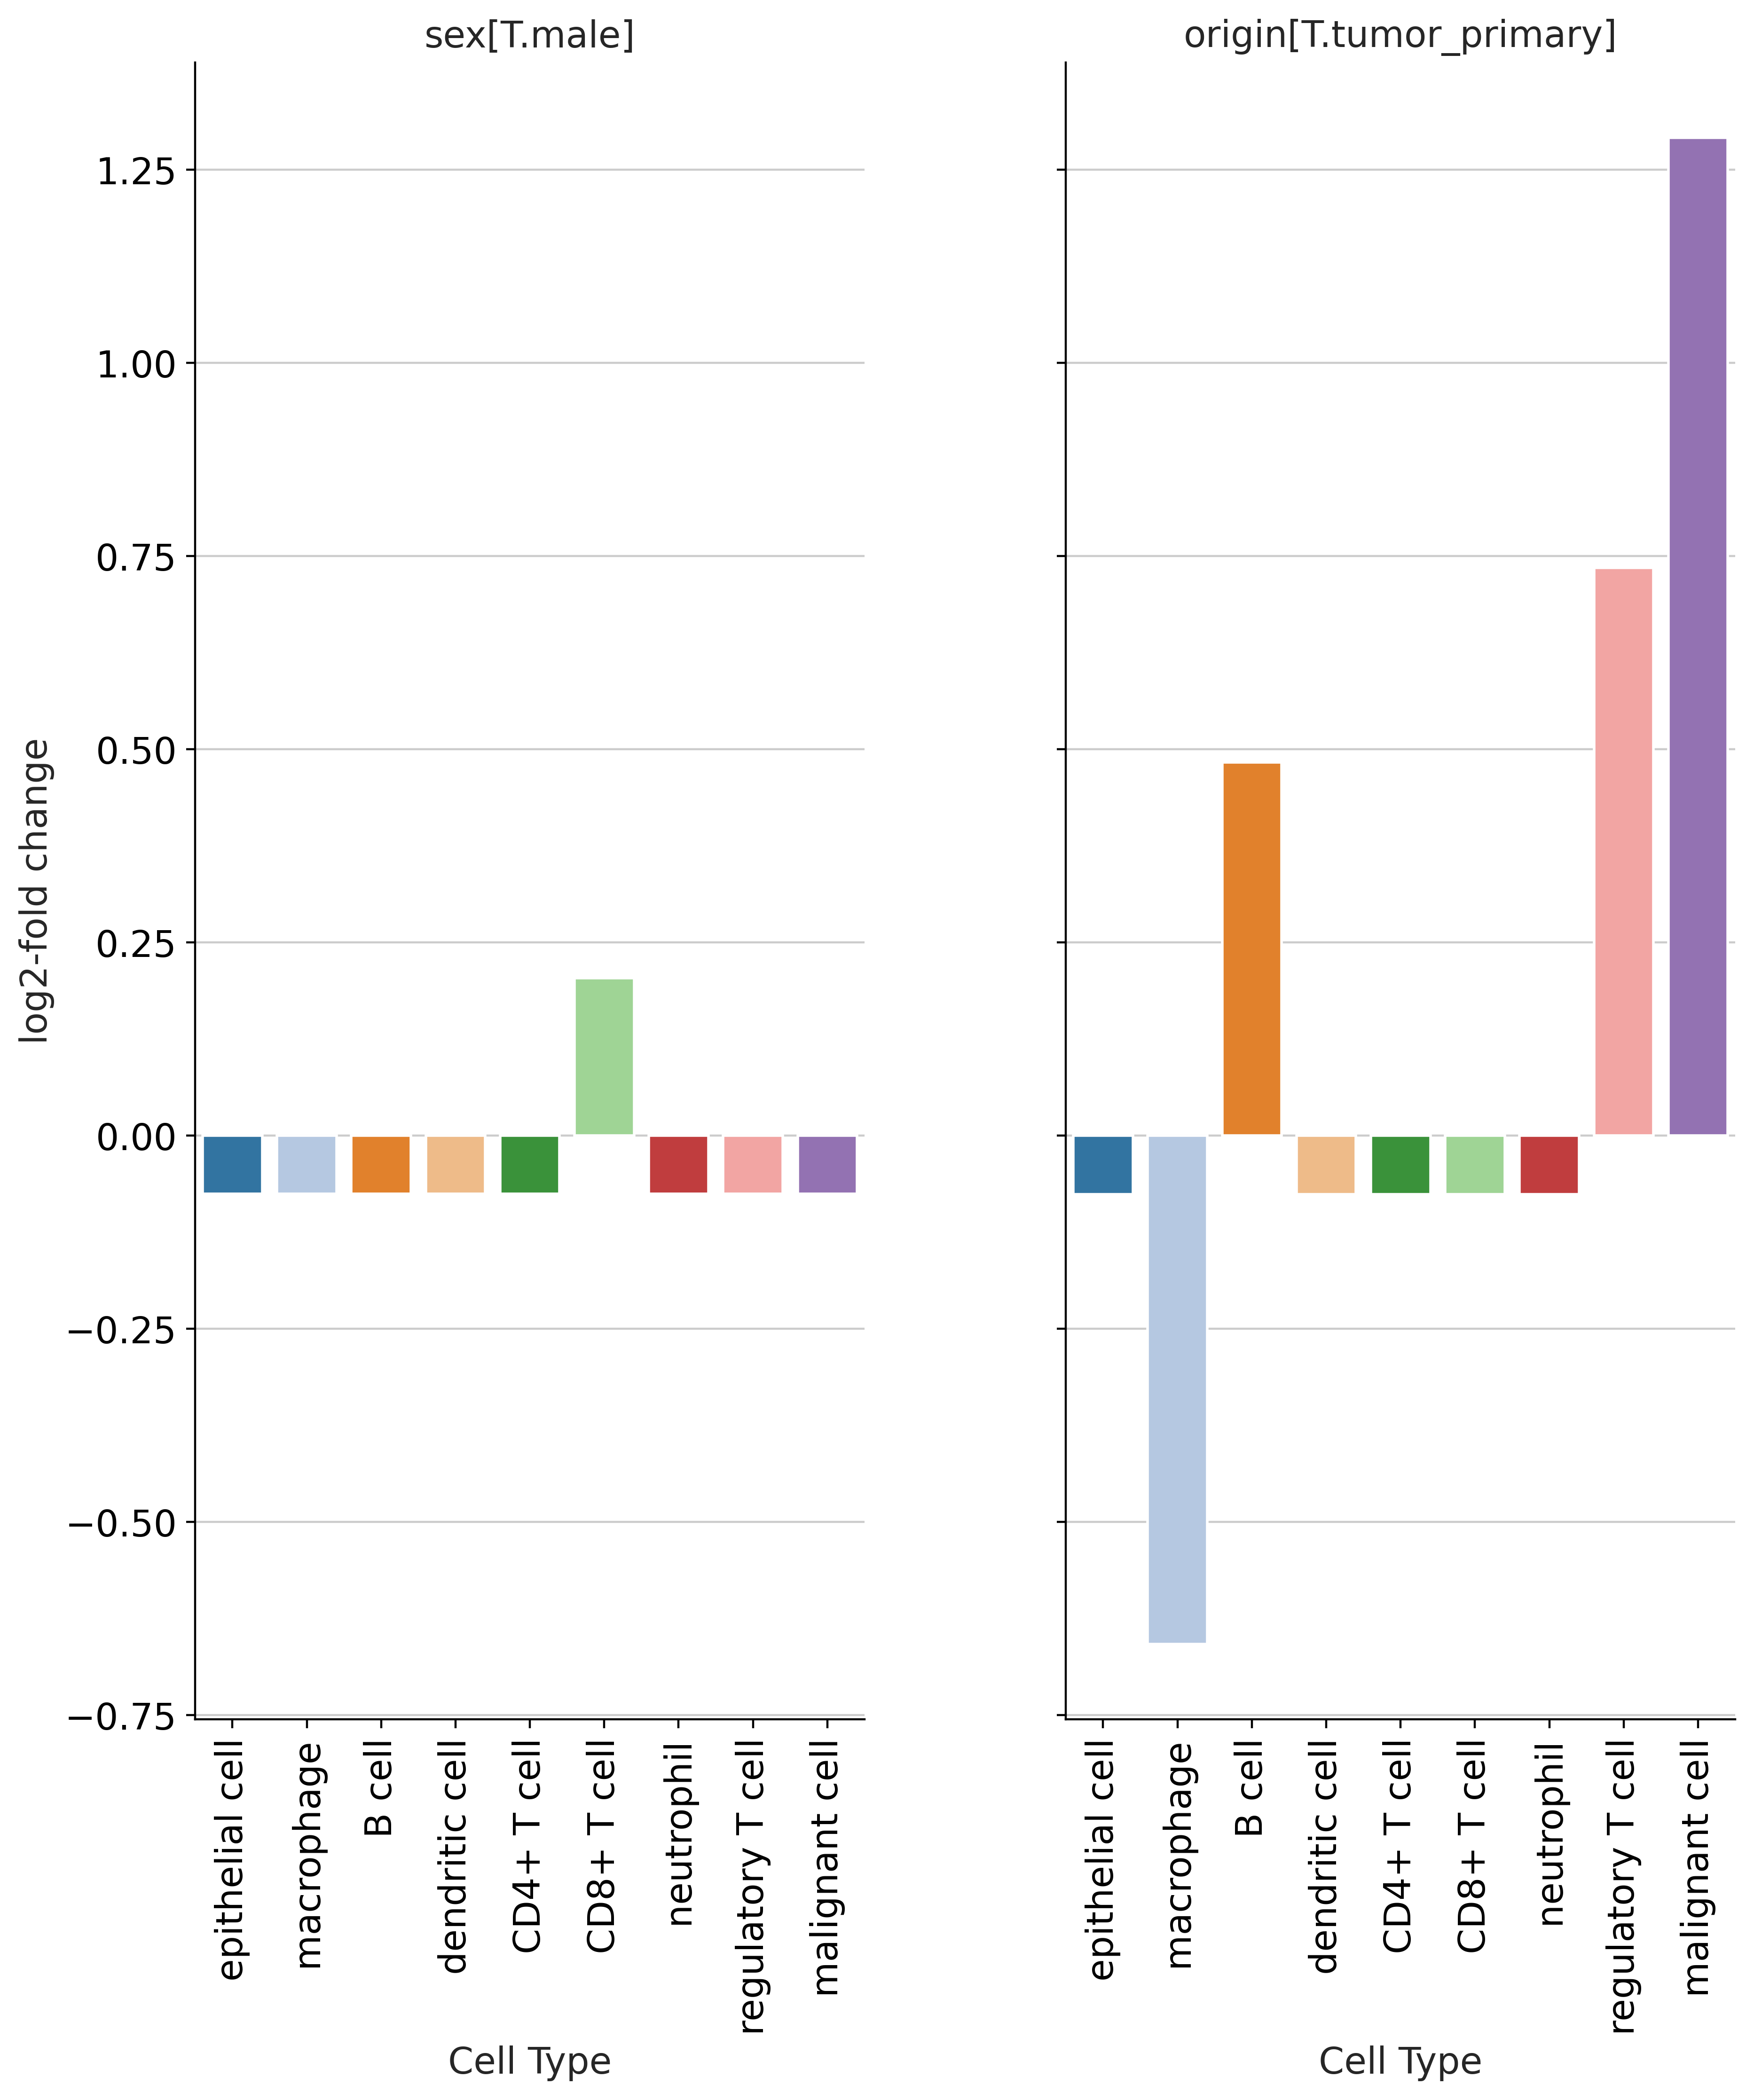

In [84]:
sccoda_model.plot_effects_barplot(sccoda_data, modality_key="coda_sex", parameter="log2-fold change",figsize=(10,5))

In [85]:
sccoda_model.get_effect_df(sccoda_data, modality_key="coda_sex")

Final Parameter  HDI 3%  HDI 97%  \
Covariate             Cell Type                                             
sexT.male             epithelial cell           0.000000  -0.276    0.138   
                      macrophage                0.000000  -0.060    0.421   
                      B cell                    0.000000  -0.165    0.234   
                      dendritic cell            0.000000   0.000    0.000   
                      CD4+ T cell               0.000000  -0.125    0.257   
                      CD8+ T cell               0.193605  -0.024    0.428   
                      neutrophil                0.000000  -0.260    0.154   
                      regulatory T cell         0.000000  -0.151    0.232   
                      malignant cell            0.000000  -0.185    0.214   
originT.tumor_primary epithelial cell           0.000000  -0.184    0.319   
                      macrophage               -0.403562  -0.661   -0.105   
                      B cell                    0.387434   0.074    0.669   
                      dendritic cell            0.000000   0.000    0.000   
                      CD4+ T cell               0.000000  -0.066    0.349   
                      CD8+ T cell               0.000000  -0.205    0.206   
                      neutrophil                0.000000  -0.275    0.224   
                      regulatory T cell         0.561900   0.274    0.841   
                      malignant cell            0.947748   0.645    1.223   

                                            SD  Inclusion probability  \
Covariate             Cell Type                                         
sexT.male             epithelial cell    0.081                 0.4523   
                      macrophage         0.138                 0.6417   
                      B cell             0.067                 0.4056   
                      dendritic cell     0.000                 0.0000   
                      CD4+ T cell        0.073                 0.4277   
                      CD8+ T cell        0.141                 0.7680   
                      neutrophil         0.074                 0.4317   
                      regulatory T cell  0.066                 0.4075   
                      malignant cell     0.067                 0.4136   
originT.tumor_primary epithelial cell    0.071                 0.2684   
                      macrophage         0.160                 0.9531   
                      B cell             0.181                 0.9094   
                      dendritic cell     0.000                 0.0000   
                      CD4+ T cell        0.097                 0.3637   
                      CD8+ T cell        0.050                 0.2144   
                      neutrophil         0.068                 0.2532   
                      regulatory T cell  0.139                 1.0000   
                      malignant cell     0.153                 1.0000   

                                         Expected Sample  log2-fold change  
Covariate             Cell Type                                             
sexT.male             epithelial cell         106.113026         -0.075089  
                      macrophage              349.151111         -0.075089  
                      B cell                  109.673176         -0.075089  
                      dendritic cell           66.853577         -0.075089  
                      CD4+ T cell             558.639750         -0.075089  
                      CD8+ T cell             572.555482          0.204223  
                      neutrophil               56.911920         -0.075089  
                      regulatory T cell       119.045386         -0.075089  
                      malignant cell           48.158845         -0.075089  
originT.tumor_primary epithelial cell         106.058405         -0.075832  
                      macrophage              233.090655         -0.658050  
                      B cell          

In [86]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_sex").loc["sexT.male"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Male vs Female",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

alt.Chart(...)

In [87]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_sex").loc["originT.tumor_primary"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Tumor vs Normal",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

alt.Chart(...)

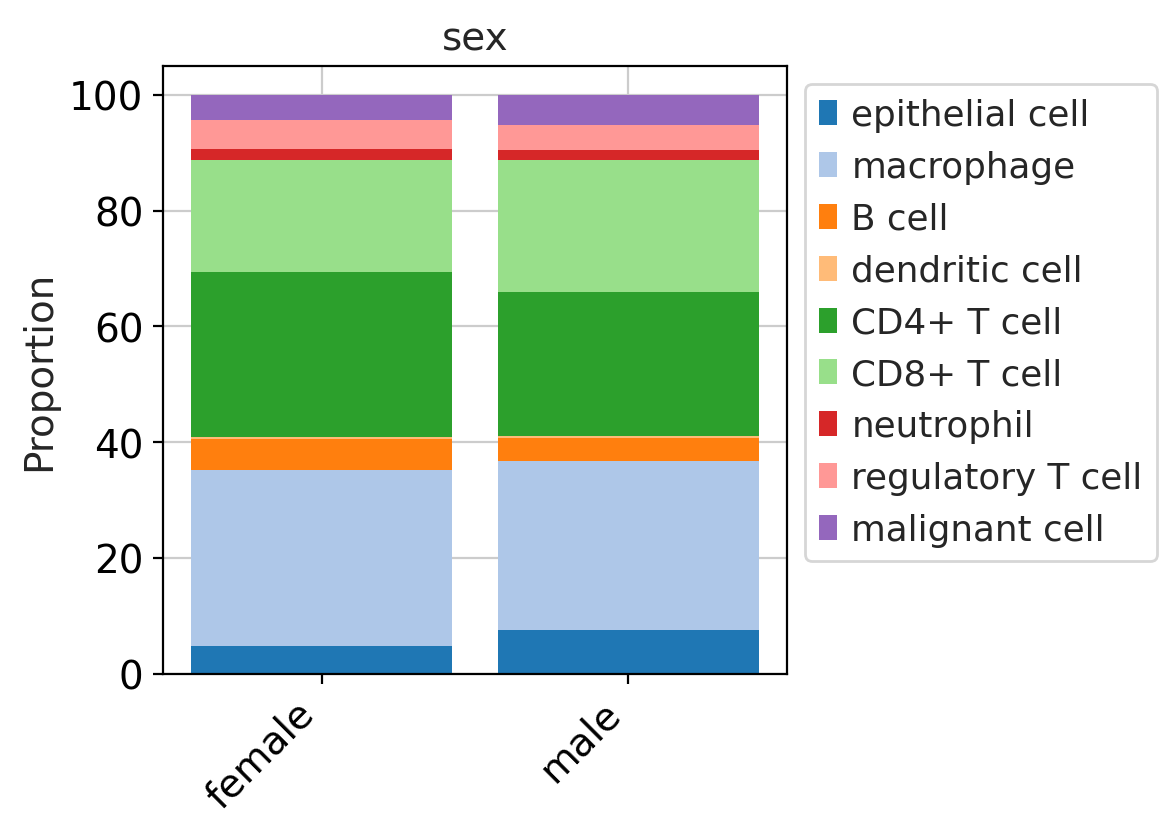

In [88]:
sccoda_model.plot_stacked_barplot(sccoda_data, modality_key="coda_sex", feature_name="sex")
plt.show()

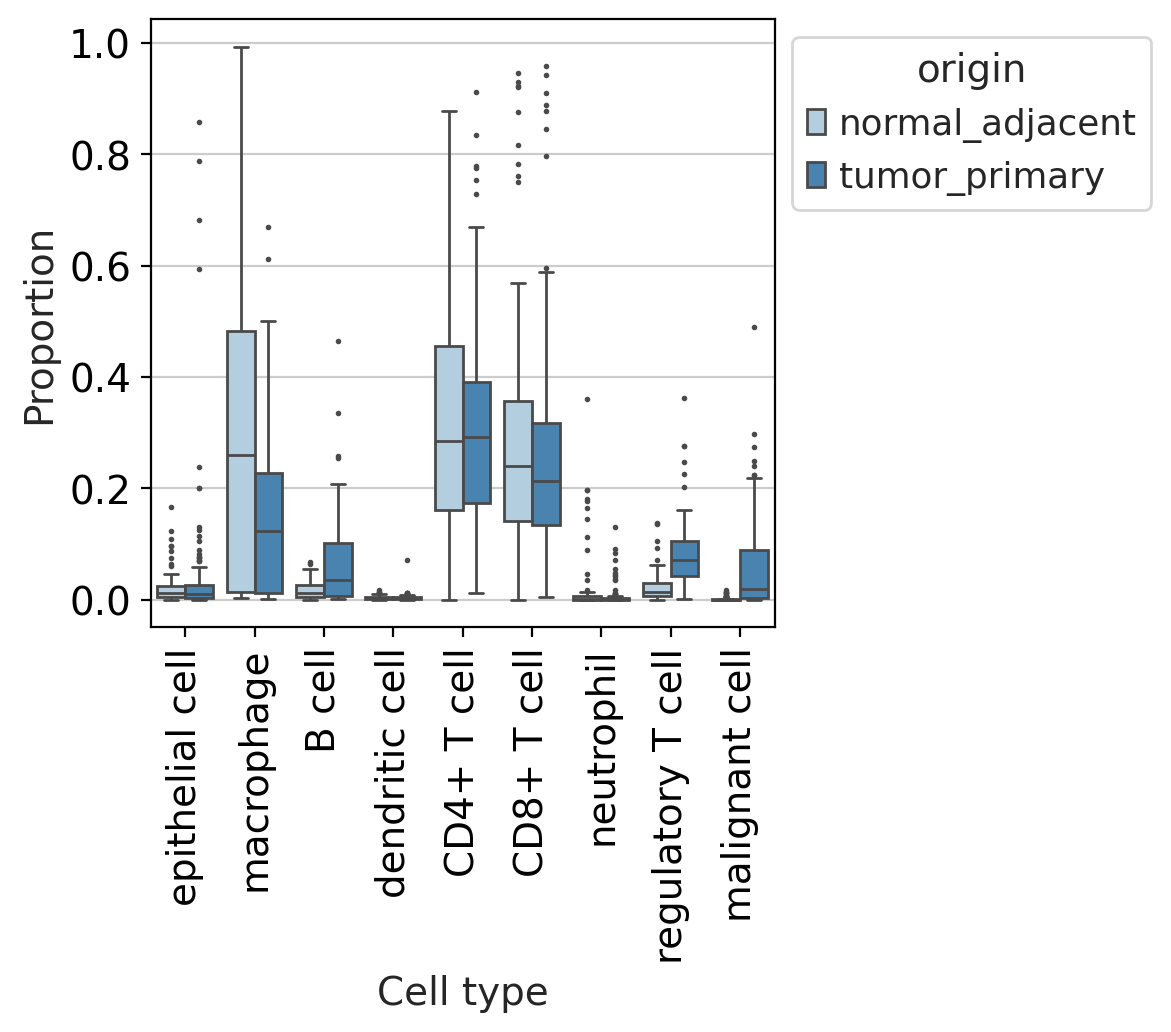

In [89]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_sex", feature_name="origin", add_dots=False)
plt.show()

In [ ]:
adata_male = adata[adata.obs["sex"]=="male"]

In [ ]:
# Convert data to mudata object
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata_male,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["age","sex","dataset","origin"],
)

# Select control and salmonella data as one modality
sccoda_data.mod["coda_male_origin"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["origin"].isin(["tumor_primary", "normal_adjacent"])
].copy()
print(sccoda_data)



In [ ]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_male_origin", feature_name="origin", add_dots=False)
plt.show()

In [ ]:
fig = sccoda_model.plot_stacked_barplot(
    sccoda_data,
    modality_key="coda_male_origin",
    feature_name="origin"

)

In [ ]:
sccoda_model.plot_rel_abundance_dispersion_plot(sccoda_data, modality_key="coda_male_origin", abundant_threshold=0.9)

In [ ]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda_male_origin",
    formula = "origin",
    reference_cell_type="automatic",
    automatic_reference_absence_threshold=1
)
sccoda_data["coda_male_origin"]

In [ ]:
sccoda_data

In [ ]:
# Run MCMC
sccoda_model.run_nuts(sccoda_data, modality_key="coda_male_origin")
sccoda_data["coda_male_origin"]

In [ ]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda_male_origin", est_fdr=0.1)


In [ ]:
sccoda_model.summary(sccoda_data, modality_key="coda_male_origin")

In [ ]:
sccoda_model.summary(sccoda_data, modality_key="coda_male_origin", extended=True)

In [ ]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda_male_origin")

In [ ]:
sccoda_model.plot_effects_barplot(sccoda_data, modality_key="coda_male_origin", parameter="log2-fold change",figsize=(10,5))

In [ ]:
sccoda_model.get_effect_df(sccoda_data, modality_key="coda_male_origin")

In [ ]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_male_origin").loc["originT.tumor_primary"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Only Male Tumor vs Normal",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

In [ ]:
sccoda_model.plot_stacked_barplot(sccoda_data, modality_key="coda_male_origin", feature_name="origin")
plt.show()

# Only Tumor Male vs Female 

In [220]:
adata_luad_tumor = adata_luad[adata_luad.obs["origin"]=="tumor_primary"]

In [221]:
# Convert data to mudata object
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata_luad_tumor,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["age","sex","dataset","origin","disease"],
)

# Select control and salmonella data as one modality
sccoda_data.mod["coda_tumor_mvsf"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["sex"].isin(["male", "female"])
].copy()
print(sccoda_data)



MuData object with n_obs × n_vars = 191877 × 17820
  3 modalities
    rna:	191783 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'

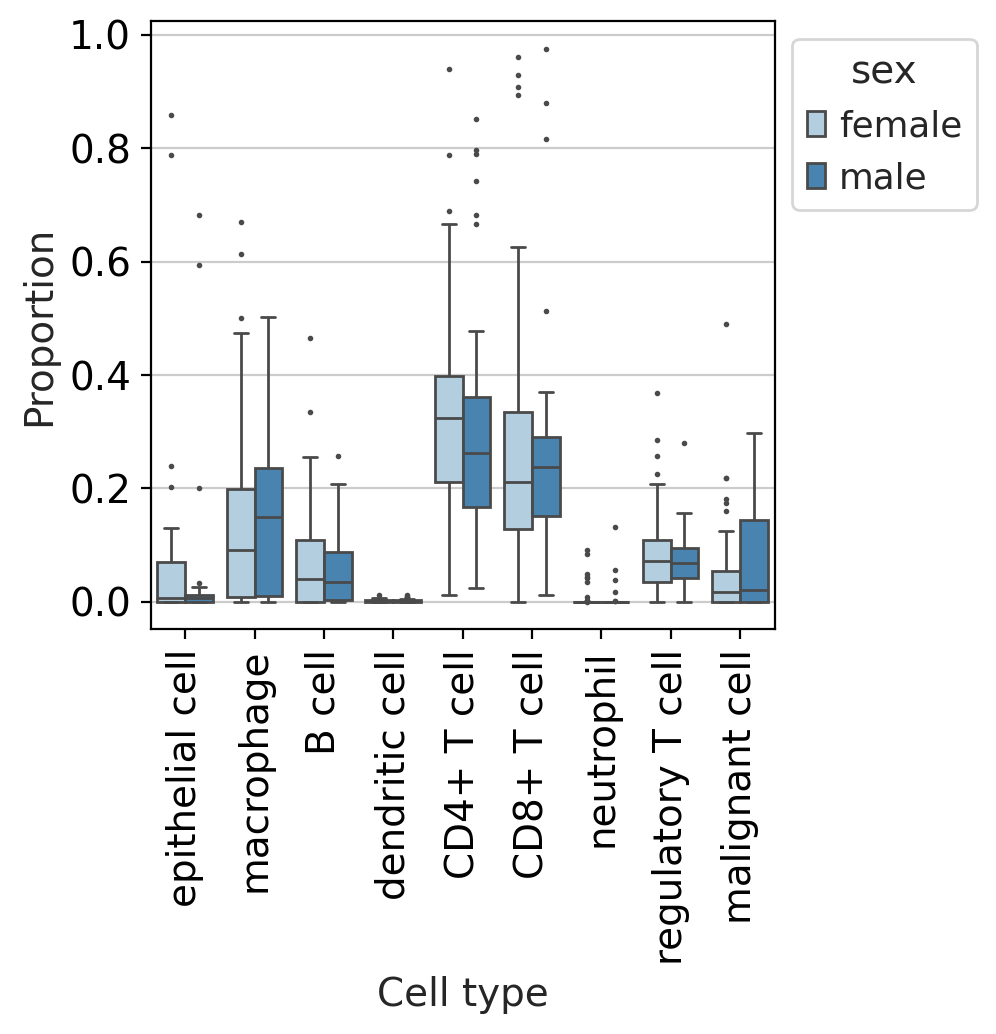

In [222]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_tumor_mvsf", feature_name="sex", add_dots=False)
plt.show()

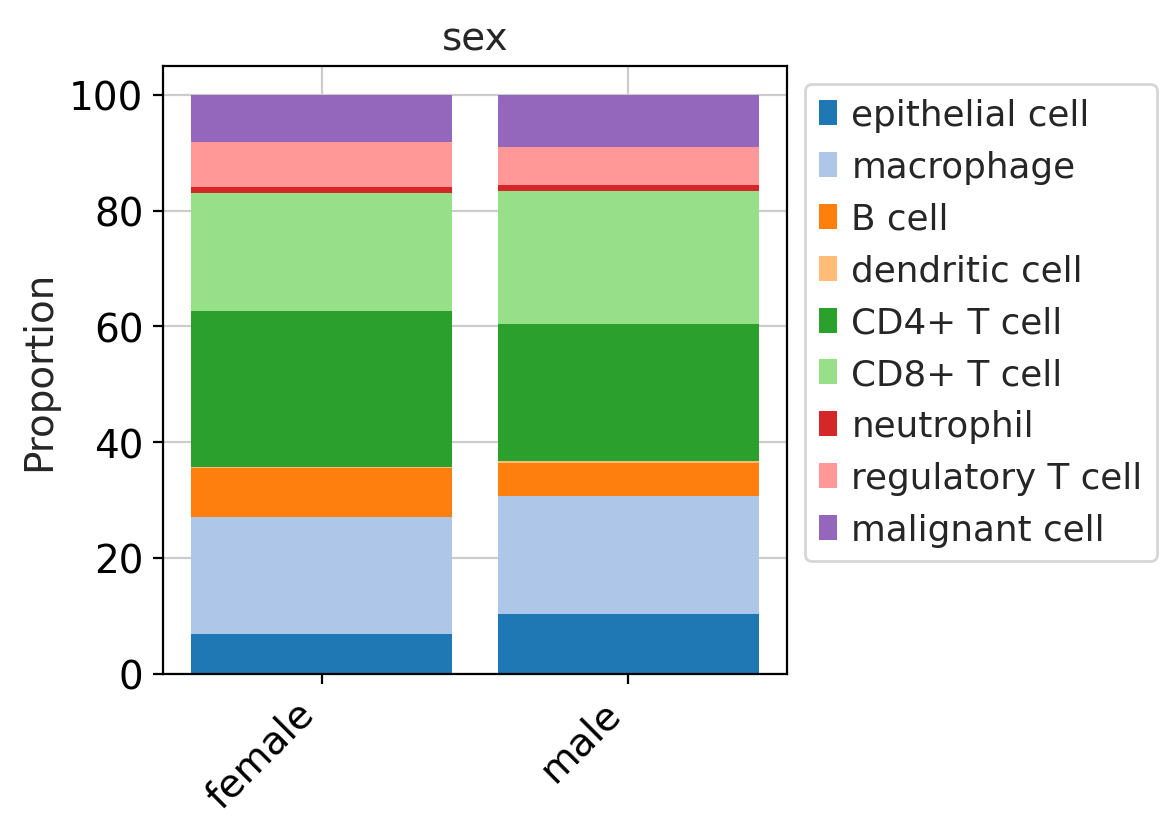

In [226]:
fig = sccoda_model.plot_stacked_barplot(
    sccoda_data,
    modality_key="coda_tumor_mvsf",
    feature_name="sex"

)

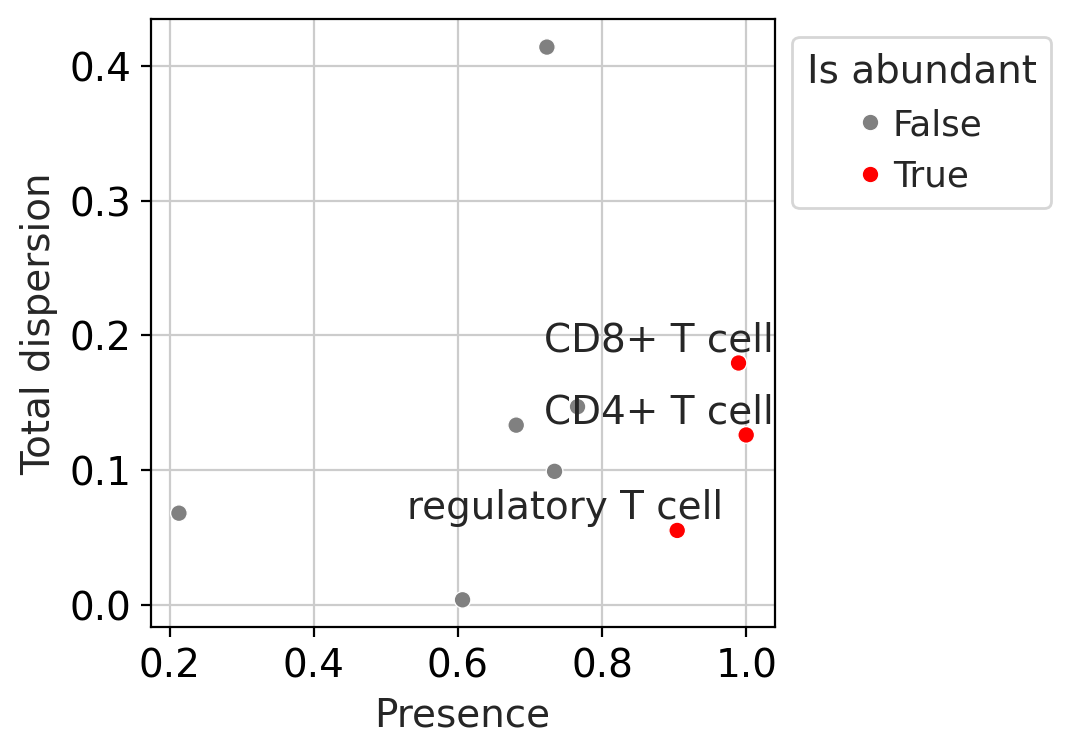

In [227]:
sccoda_model.plot_rel_abundance_dispersion_plot(sccoda_data, modality_key="coda_tumor_mvsf", abundant_threshold=0.9)

In [228]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda_tumor_mvsf",
   formula = "sex + origin",
    reference_cell_type="macrophage",
    automatic_reference_absence_threshold=1
)
sccoda_data["coda_tumor_mvsf"]

• Zero counts encountered in data! Added a pseudocount of 0.5.


AnnData object with n_obs × n_vars = 94 × 9
    obs: 'dataset', 'age', 'sex', 'disease', 'origin', 'sample'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

In [153]:
sccoda_data

MuData object with n_obs × n_vars = 191877 × 17820
  3 modalities
    rna:	191783 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	94 x 9
      obs:	'dataset', 'age', 'sex', 'disease', 'origin', 'sample'
      var:	'n_cells'
    coda_tumor_mvsf:	94 x 9
      obs:	'dataset', 'age', 'sex', 'disease', 'origin', 'sample'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'

In [154]:
# Run MCMC
sccoda_model.run_nuts(sccoda_data, modality_key="coda_tumor_mvsf")
sccoda_data["coda_tumor_mvsf"]

sample: 100%|██████████| 11000/11000 [13:23<00:00, 13.69it/s, 127 steps of size 3.60e-02. acc. prob=0.90]


AnnData object with n_obs × n_vars = 94 × 9
    obs: 'dataset', 'age', 'sex', 'disease', 'origin', 'sample'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_sex[T.male]'

In [ ]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda_tumor_mvsf", est_fdr=0.2)

In [211]:
sccoda_model.summary(sccoda_data, modality_key="coda_tumor_mvsf")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 94 samples, 9 cell types                                    │
│ Reference cell type                         │ dendritic cell                                                    │
│ Formula                                     │ sex + origin                                                      │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ epithelial cell        -0.924          107.695                                                                  │
│ macrophage             -0.133          237.533                                                                  │
│ B cell                 -0.538          158.429                                                                  │
│ dendritic cell         -1.442           64.155                                                                  │
│ CD4+ T cell             0.798          602.632                                                                  │
│ CD8+ T cell             0.582          485.562                                                                  │
│ neutrophil             -1.628           53.266                                                                  │
│ regulatory T cell      -0.265          208.160                                                                  │
│ malignant cell         -0.783          124.003                                                                  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              Final Parameter  Expected Sample  log2-fold change                                 │
│ Covariate Cell Type                                                                                             │
│ sexT.male epithelial cell        0.000           107.695            0.000                                       │
│           macrophage             0.000           237.533            0.000                                       │
│           B cell                 0.000           158.429            0.000                                       │
│           dendritic cell         0.000            64.155            0.000                                       │
│           CD4+ T cell            0.000           602.632            0.000                                       │
│           CD8+ T cell            0.000           485.562            0.000                                       │
│           neutrophil             0.000            53.266            0.000                                       │
│           regulatory T cell      0.000           208.160            0.000                                       │
│           malignant cell         0.000           124.003            0.000                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [212]:
sccoda_model.summary(sccoda_data, modality_key="coda_tumor_mvsf", extended=True)

                                          Compositional Analysis summary                                           
┌───────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────┐
│ Name                                  │ Value                                                                   │
├───────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Data                                  │ Data: 94 samples, 9 cell types                                          │
│ Reference cell type                   │ dendritic cell                                                          │
│ Formula                               │ sex + origin                                                            │
│ Reference index                       │ 3                                                                       │
│ Spike-and-slab threshold              │ 1.000                                                                   │
│ Spike-and-slab threshold              │ 1.000                                                                   │
│ MCMC Sampling                         │ Sampled 10000 chain states (1000 burnin samples)                        │
│ Acceptance rate                       │ 89.5%                                                                   │
└───────────────────────────────────────┴─────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  HDI 3%  HDI 97%   SD   Expected Sample                                      │
│ Cell Type                                                                                                       │
│ epithelial cell        -0.924       -1.133  -0.716  0.111     107.695                                           │
│ macrophage             -0.133       -0.325   0.072  0.105     237.533                                           │
│ B cell                 -0.538       -0.738  -0.337  0.106     158.429                                           │
│ dendritic cell         -1.442       -1.634  -1.234  0.106      64.155                                           │
│ CD4+ T cell             0.798        0.629   0.966  0.089     602.632                                           │
│ CD8+ T cell             0.582        0.407   0.754  0.092     485.562                                           │
│ neutrophil             -1.628       -1.841  -1.421  0.113      53.266                                           │
│ regulatory T cell      -0.265       -0.467  -0.086  0.102     208.160                                           │
│ malignant cell         -0.783       -0.995  -0.585  0.109     124.003                                           │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              Final Parameter  Expected Sample  log2-fold change                                 │
│ Covariate Cell Type                                                                                             │
│ sexT.male epithelial cell        0.000           107.695            0.000                                       │
│           macrophage             0.000           237.533            0.000                                       │
│           B cell                 0.000           158.429            0.000                                       │
│           dendritic cell         0.000            64.155            0.000                                       │
│           CD4+ T cell            0.000           602.632            0.000                                       │
│           CD8+ T cell            0.000           485.562            0.000                                       │
│           neutrophil             0.000            53.266            0.000                                       │
│           regulatory T cell      0.000           208.160            0.000                                       │
│           malignant cell         0.000           124.003            0.000                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects Extended                                                                                                │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              HDI 3%  HDI 97%   SD   Inclusion probability                                       │
│ Covariate Cell Type                                                                                             │
│ sexT.male epithelial cell    -0.372  0.116   0.106         0.511                                                │
│           macrophage         -0.154  0.281   0.080         0.463                                                │
│           B cell             -0.235  0.179   0.071         0.455                                                │
│           dendritic cell      0.000  0.000   0.000         0.000                                                │
│           CD4+ T cell        -0.158  0.188   0.059         0.437                                                │
│           CD8+ T cell        -0.125  0.276   0.079         0.480                                                │
│           neutrophil         -0.237  0.191   0.077         0.464                                                │
│           regulatory T cell  -0.200  0.185   0.064         0.439                                                │
│           malignant cell     -0.175  0.255   0.076         0.467                                                │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [213]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda_tumor_mvsf")

Covariate    Cell Type        
sex[T.male]  epithelial cell      False
             macrophage           False
             B cell               False
             dendritic cell       False
             CD4+ T cell          False
             CD8+ T cell          False
             neutrophil           False
             regulatory T cell    False
             malignant cell       False
Name: Final Parameter, dtype: bool

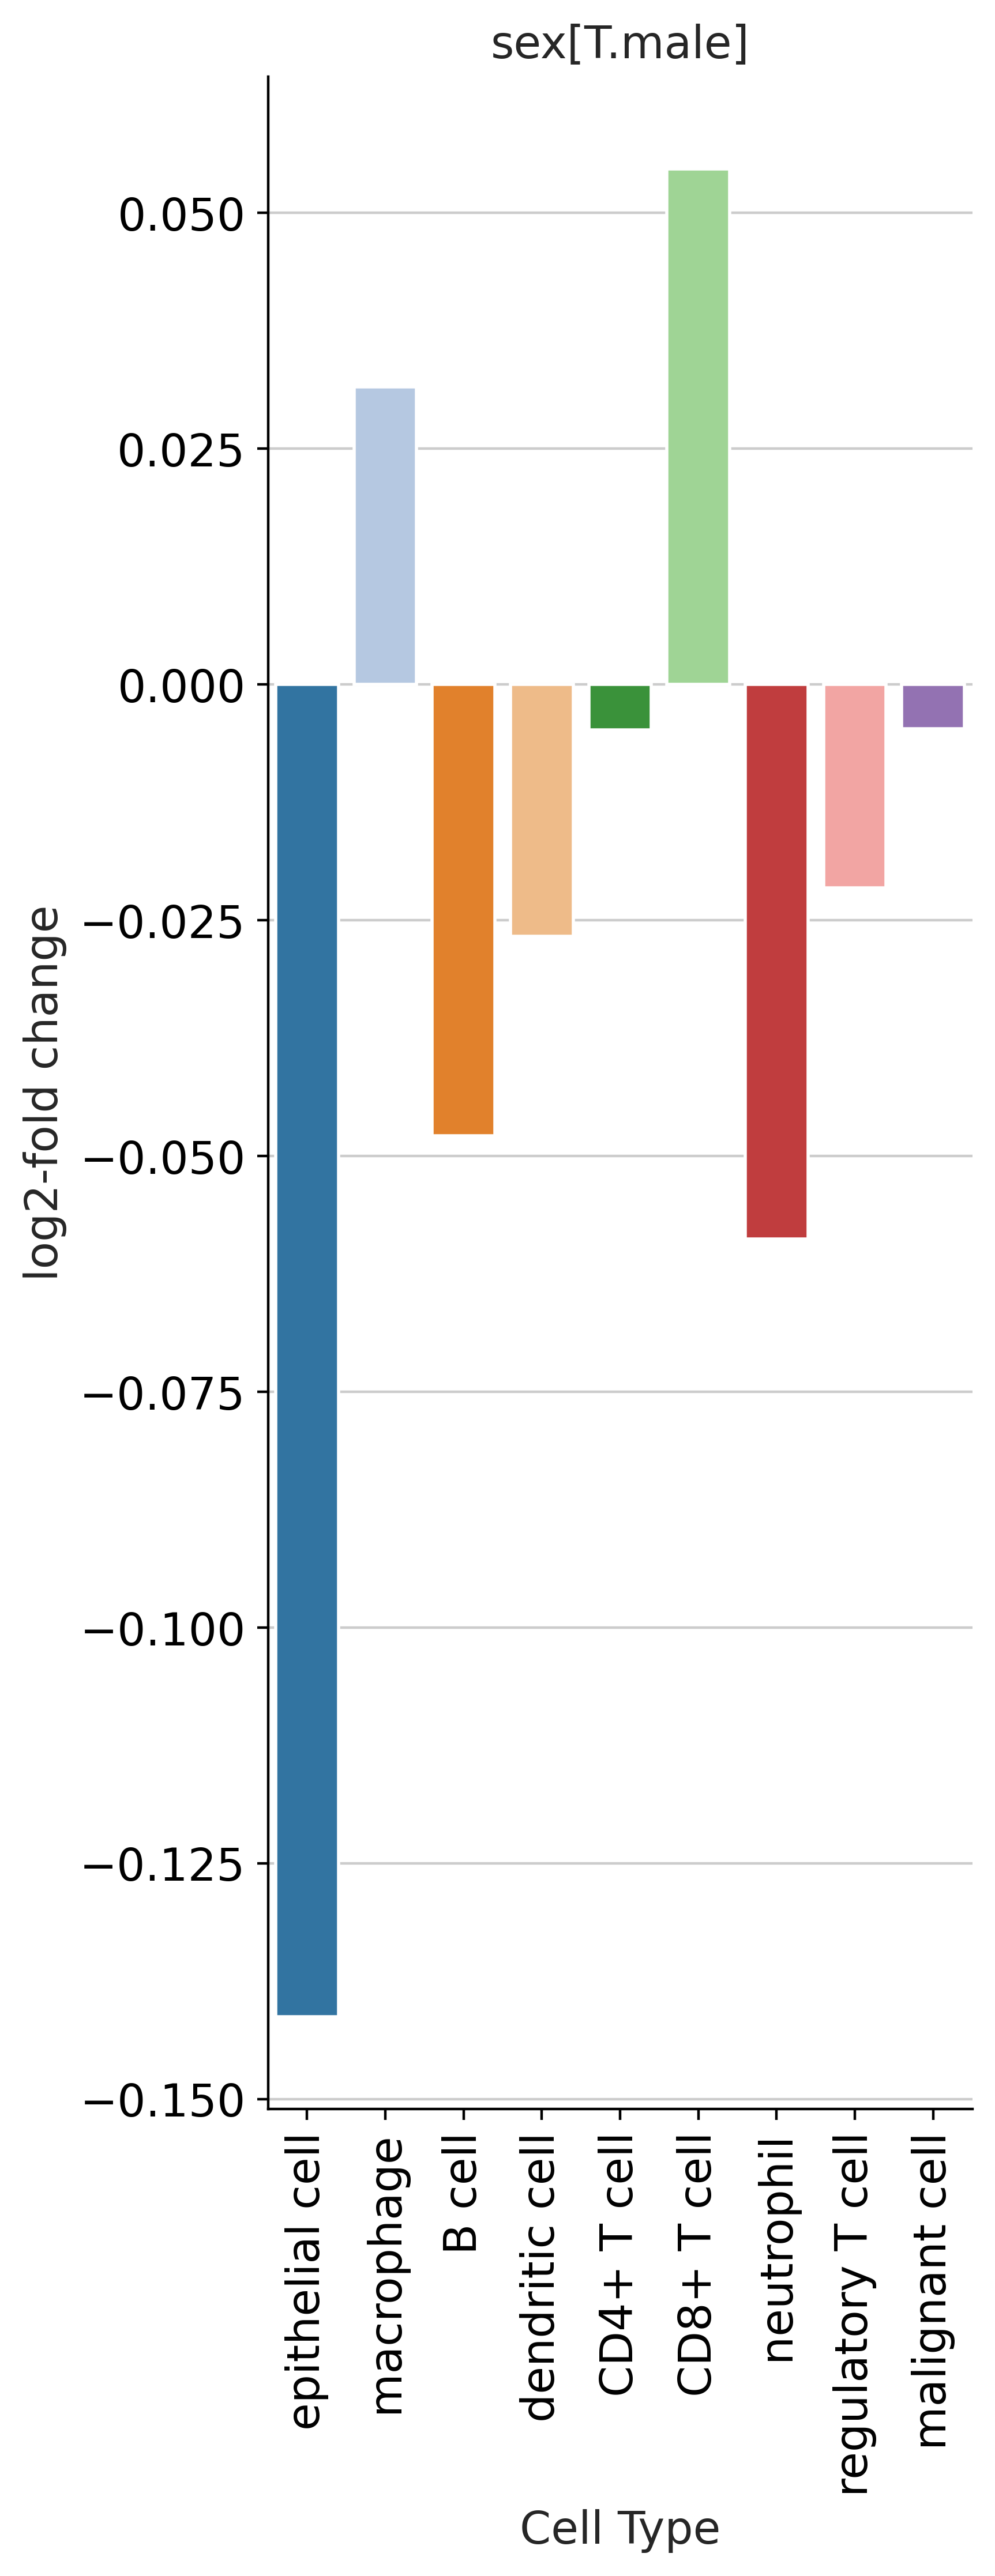

In [205]:
sccoda_model.plot_effects_barplot(sccoda_data, modality_key="coda_tumor_mvsf", parameter="log2-fold change",figsize=(10,5))

In [ ]:
sccoda_model.get_effect_df(sccoda_data, modality_key="coda_tumor_mvsf")

In [ ]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_tumor_mvsf").loc["sexT.male"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Only Tumor Male vs Female",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

In [182]:
sccoda_data

MuData object with n_obs × n_vars = 191877 × 17820
  3 modalities
    rna:	191783 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	94 x 9
      obs:	'dataset', 'age', 'sex', 'disease', 'origin', 'sample'
      var:	'n_cells'
    coda_tumor_mvsf:	94 x 9
      obs:	'dataset', 'age', 'sex', 'disease', 'origin', 'sample'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_sex[T.male]'

In [185]:
sccoda_data["rna"].obs.origin.value_counts()

origin
tumor_primary    191783
Name: count, dtype: int64

In [187]:
adata_luad.obs.origin.value_counts()

origin
tumor_primary      191783
normal_adjacent    157709
Name: count, dtype: int64

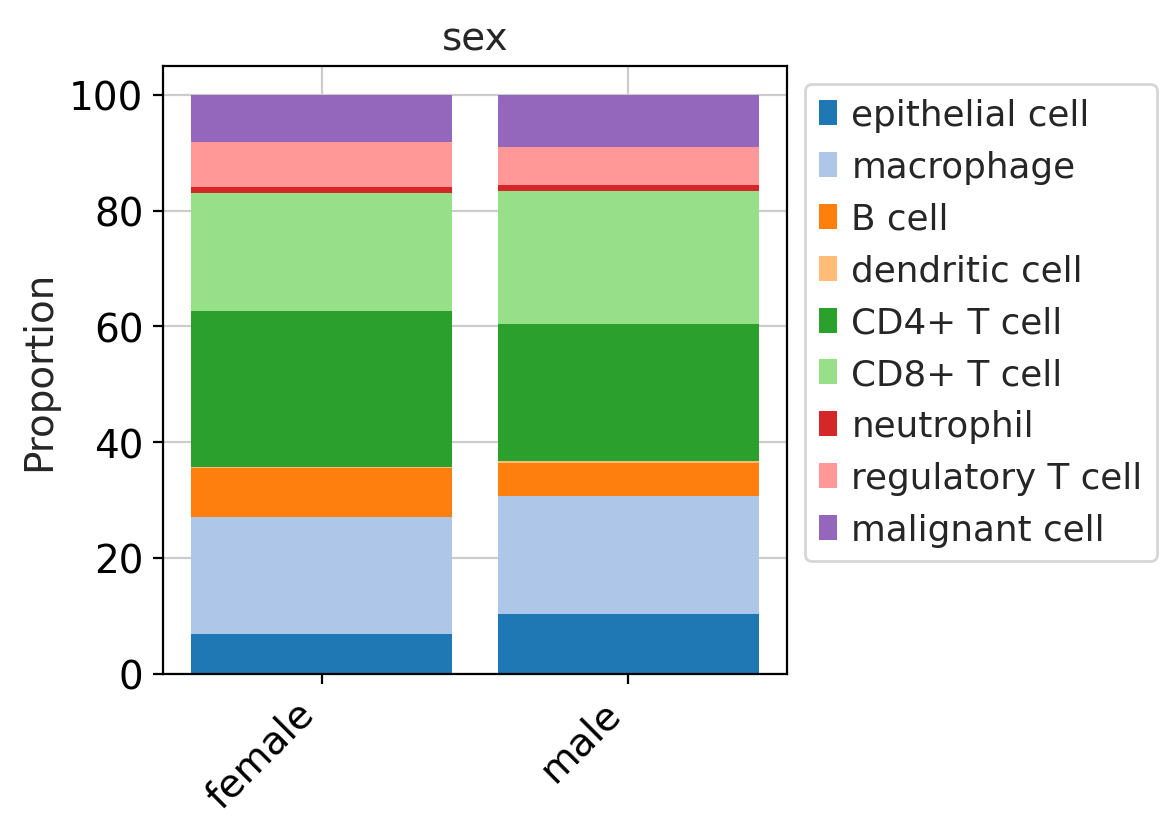

In [214]:
sccoda_model.plot_stacked_barplot(sccoda_data, modality_key="coda_tumor_mvsf", feature_name="sex")
plt.show()

In [86]:
# Run scCODA with each cell type as the reference
cell_types = sccoda_data["coda_tumor_mvsf"].var.index
results_cycle = pd.DataFrame(index=cell_types, columns=["times_credible"]).fillna(0)

for ct in cell_types:
    print(f"Reference: {ct}")

    # Run inference
    sccoda_data = sccoda_model.prepare(
        sccoda_data,
        modality_key="coda_tumor_mvsf",
        formula="sex",
        reference_cell_type=ct,
    )
    sccoda_model.run_nuts(sccoda_data, modality_key="coda_tumor_mvsf")

    # Select credible effects
    cred_eff = sccoda_model.credible_effects(sccoda_data, modality_key="coda_tumor_mvsf")
    cred_eff.index = cred_eff.index.droplevel(level=0)

    # add up credible effects
    results_cycle["times_credible"] += cred_eff.astype("int")

Reference: epithelial cell


sample: 100%|██████████| 11000/11000 [03:18<00:00, 55.51it/s, 63 steps of size 8.28e-02. acc. prob=0.66] 


Reference: macrophage


sample: 100%|██████████| 11000/11000 [03:41<00:00, 49.56it/s, 63 steps of size 5.74e-02. acc. prob=0.78] 


Reference: B cell


sample: 100%|██████████| 11000/11000 [06:33<00:00, 27.98it/s, 127 steps of size 3.50e-02. acc. prob=0.87]


Reference: dendritic cell


sample: 100%|██████████| 11000/11000 [03:32<00:00, 51.70it/s, 63 steps of size 6.90e-02. acc. prob=0.69] 


Reference: CD4+ T cell


sample: 100%|██████████| 11000/11000 [51:32<00:00,  3.56it/s, 1023 steps of size 7.86e-13. acc. prob=0.93]


Reference: CD8+ T cell


sample: 100%|██████████| 11000/11000 [57:08<00:00,  3.21it/s, 1023 steps of size 5.29e-13. acc. prob=0.96] 

! Acceptance rate unusually high (0.956583333163972 > 0.95)! Results might be incorrect! Please check feasibility of results and re-run the sampling step with a different rng_key if necessary.


Reference: neutrophil


sample: 100%|██████████| 11000/11000 [03:27<00:00, 52.98it/s, 63 steps of size 7.37e-02. acc. prob=0.68] 


Reference: regulatory T cell


sample: 100%|██████████| 11000/11000 [02:26<00:00, 75.00it/s, 31 steps of size 9.92e-02. acc. prob=0.62] 


Reference: malignant cell


sample: 100%|██████████| 11000/11000 [03:37<00:00, 50.67it/s, 63 steps of size 6.72e-02. acc. prob=0.72] 


In [87]:
# Calculate percentages
results_cycle["pct_credible"] = results_cycle["times_credible"] / len(cell_types)
results_cycle["is_credible"] = results_cycle["pct_credible"] > 0.5
print(results_cycle)

                   times_credible  pct_credible  is_credible
cell_type                                                   
epithelial cell                 0           0.0        False
macrophage                      0           0.0        False
B cell                          0           0.0        False
dendritic cell                  0           0.0        False
CD4+ T cell                     0           0.0        False
CD8+ T cell                     0           0.0        False
neutrophil                      0           0.0        False
regulatory T cell               0           0.0        False
malignant cell                  0           0.0        False


# Only Male Tumor vs Normal 

In [132]:
adata_luad_male = adata_luad[adata_luad.obs["sex"]=="male"]

In [133]:
adata_luad_male.obs.sex.value_counts()

sex
male    145814
Name: count, dtype: int64

In [135]:
# Convert data to mudata object
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata_luad_male,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["age","sex","dataset","origin","disease"],
)

# Select control and salmonella data as one modality
sccoda_data.mod["coda_tumor_mvsf"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["origin"].isin(["tumor_primary", "normal_adjacent"])
].copy()
print(sccoda_data)



MuData object with n_obs × n_vars = 145884 × 17820
  3 modalities
    rna:	145814 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'

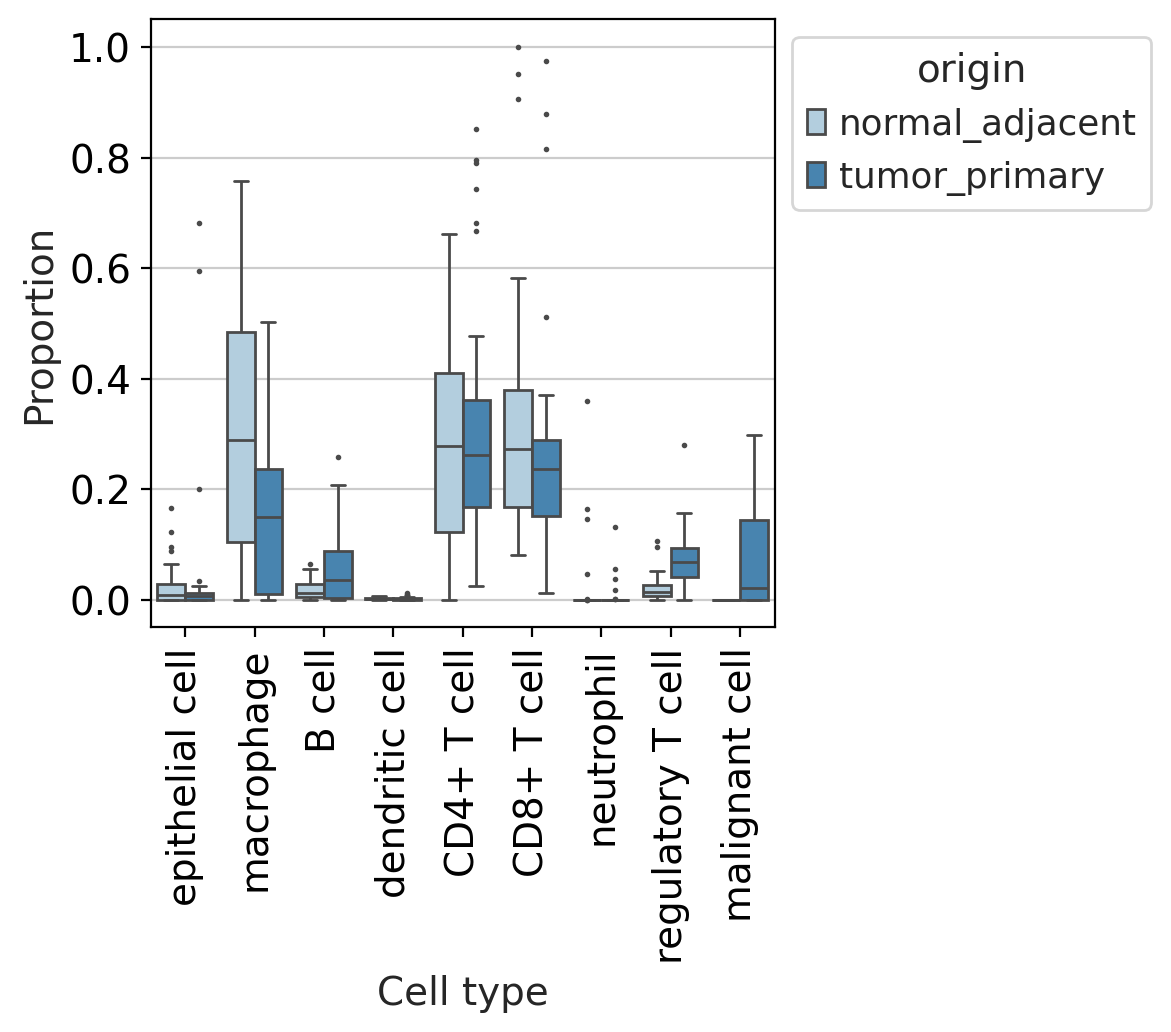

In [136]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_tumor_mvsf", feature_name="origin", add_dots=False)
plt.show()

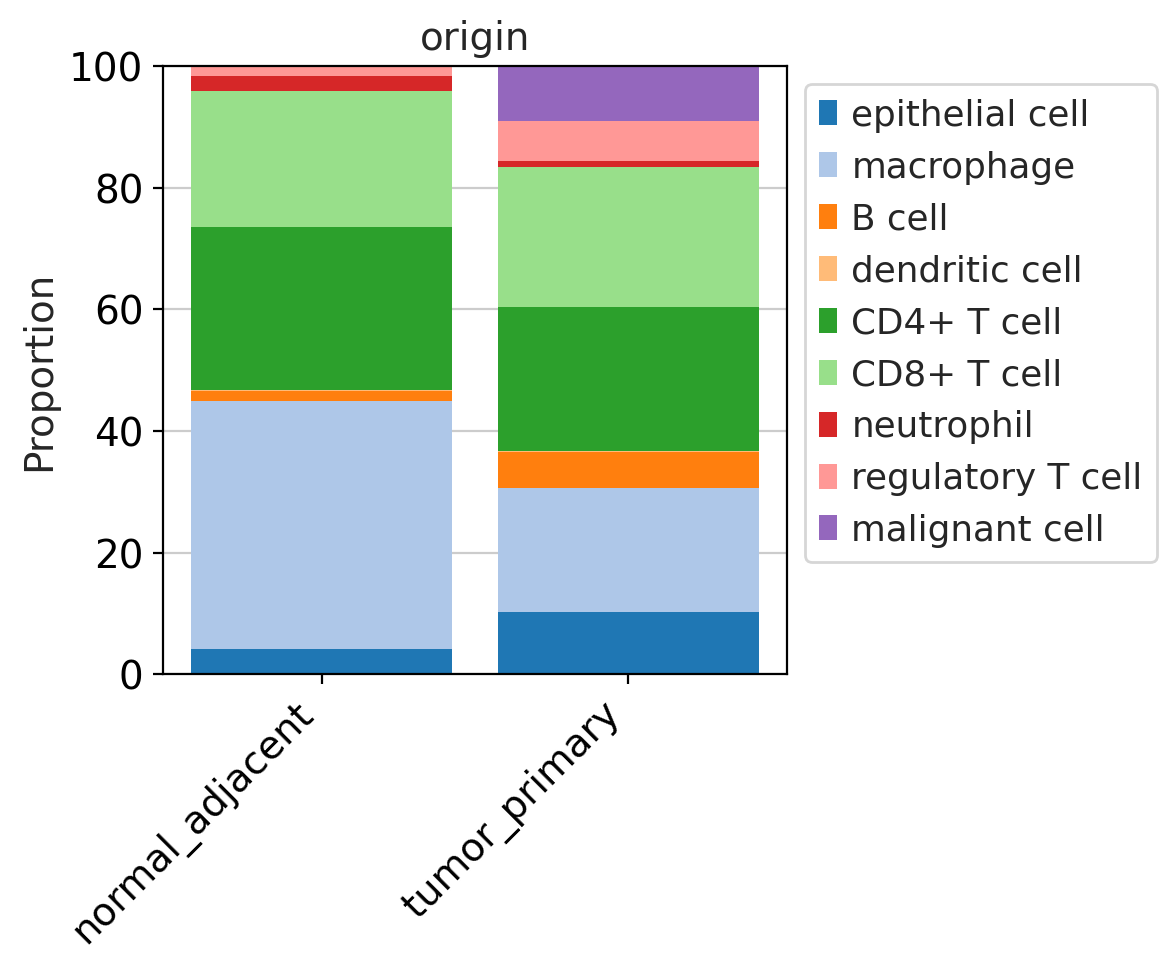

In [137]:
fig = sccoda_model.plot_stacked_barplot(
    sccoda_data,
    modality_key="coda_tumor_mvsf",
    feature_name="origin"

)

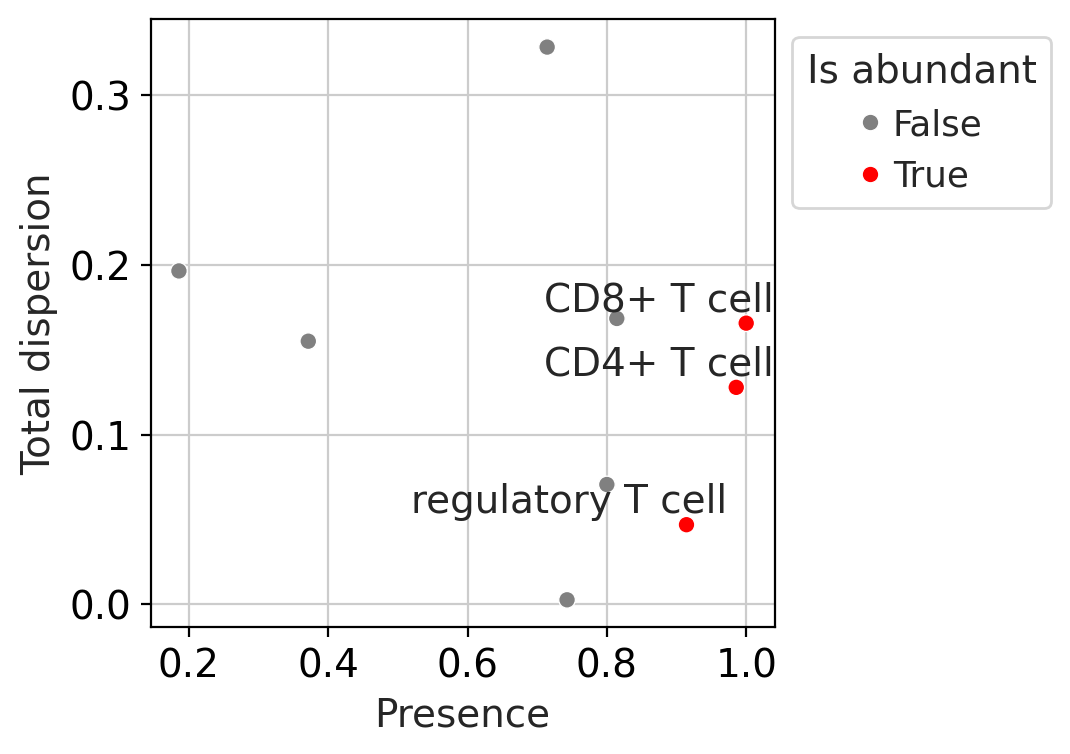

In [138]:
sccoda_model.plot_rel_abundance_dispersion_plot(sccoda_data, modality_key="coda_tumor_mvsf", abundant_threshold=0.9)

In [139]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda_tumor_mvsf",
   formula = "sex + origin",
    reference_cell_type="automatic",
    automatic_reference_absence_threshold=1
)
sccoda_data["coda_tumor_mvsf"]

• Automatic reference selection! Reference cell type set to dendritic cell
• Zero counts encountered in data! Added a pseudocount of 0.5.


AnnData object with n_obs × n_vars = 70 × 9
    obs: 'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

In [140]:
sccoda_data

MuData object with n_obs × n_vars = 145884 × 17820
  3 modalities
    rna:	145814 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	70 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
    coda_tumor_mvsf:	70 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'

In [141]:
# Run MCMC
sccoda_model.run_nuts(sccoda_data, modality_key="coda_tumor_mvsf")
sccoda_data["coda_tumor_mvsf"]

sample: 100%|██████████| 11000/11000 [03:29<00:00, 52.38it/s, 127 steps of size 2.66e-02. acc. prob=0.77]


AnnData object with n_obs × n_vars = 70 × 9
    obs: 'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_origin[T.tumor_primary]'

In [142]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda_tumor_mvsf", est_fdr=0.2)

In [143]:
sccoda_model.summary(sccoda_data, modality_key="coda_tumor_mvsf")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 70 samples, 9 cell types                                    │
│ Reference cell type                         │ dendritic cell                                                    │
│ Formula                                     │ sex + origin                                                      │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ epithelial cell        -1.005           89.660                                                                  │
│ macrophage              0.588          440.990                                                                  │
│ B cell                 -0.746          116.166                                                                  │
│ dendritic cell         -1.387           61.192                                                                  │
│ CD4+ T cell             0.852          574.226                                                                  │
│ CD8+ T cell             0.881          591.122                                                                  │
│ neutrophil             -1.643           47.372                                                                  │
│ regulatory T cell      -0.712          120.184                                                                  │
│ malignant cell         -1.731           43.381                                                                  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          Final Parameter  Expected Sample  log2-fold change                     │
│ Covariate             Cell Type                                                                                 │
│ originT.tumor_primary epithelial cell         0.000           97.594             0.122                          │
│                       macrophage             -0.587          266.951            -0.724                          │
│                       B cell                  0.000          126.445             0.122                          │
│                       dendritic cell          0.000           66.607             0.122                          │
│                       CD4+ T cell             0.000          625.037             0.122                          │
│                       CD8+ T cell            -0.225          513.850            -0.202                          │
│                       neutrophil              0.000           51.563             0.122                          │
│                       regulatory T cell       0.495          214.655             0.837                          │
│                       malignant cell          0.946          121.591             1.487                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [144]:
sccoda_model.summary(sccoda_data, modality_key="coda_tumor_mvsf", extended=True)

                                          Compositional Analysis summary                                           
┌───────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────┐
│ Name                                  │ Value                                                                   │
├───────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Data                                  │ Data: 70 samples, 9 cell types                                          │
│ Reference cell type                   │ dendritic cell                                                          │
│ Formula                               │ sex + origin                                                            │
│ Reference index                       │ 3                                                                       │
│ Spike-and-slab threshold              │ 0.491                                                                   │
│ Spike-and-slab threshold              │ 0.491                                                                   │
│ MCMC Sampling                         │ Sampled 10000 chain states (1000 burnin samples)                        │
│ Acceptance rate                       │ 77.5%                                                                   │
└───────────────────────────────────────┴─────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  HDI 3%  HDI 97%   SD   Expected Sample                                      │
│ Cell Type                                                                                                       │
│ epithelial cell        -1.005       -1.265  -0.755  0.136      89.660                                           │
│ macrophage              0.588        0.267   0.912  0.169     440.990                                           │
│ B cell                 -0.746       -1.035  -0.450  0.157     116.166                                           │
│ dendritic cell         -1.387       -1.614  -1.167  0.121      61.192                                           │
│ CD4+ T cell             0.852        0.641   1.066  0.114     574.226                                           │
│ CD8+ T cell             0.881        0.650   1.149  0.133     591.122                                           │
│ neutrophil             -1.643       -1.917  -1.380  0.140      47.372                                           │
│ regulatory T cell      -0.712       -1.031  -0.364  0.179     120.184                                           │
│ malignant cell         -1.731       -2.071  -1.386  0.182      43.381                                           │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          Final Parameter  Expected Sample  log2-fold change                     │
│ Covariate             Cell Type                                                                                 │
│ originT.tumor_primary epithelial cell         0.000           97.594             0.122                          │
│                       macrophage             -0.587          266.951            -0.724                          │
│                       B cell                  0.000          126.445             0.122                          │
│                       dendritic cell          0.000           66.607             0.122                          │
│                       CD4+ T cell             0.000          625.037             0.122                          │
│                       CD8+ T cell            -0.225          513.850            -0.202                          │
│                       neutrophil              0.000           51.563             0.122                          │
│                       regulatory T cell       0.495          214.655             0.837                          │
│                       malignant cell          0.946          121.591             1.487                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects Extended                                                                                                │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          HDI 3%  HDI 97%   SD   Inclusion probability                           │
│ Covariate             Cell Type                                                                                 │
│ originT.tumor_primary epithelial cell    -0.487   0.282  0.122         0.316                                    │
│                       macrophage         -0.968  -0.176  0.231         0.960                                    │
│                       B cell             -0.121   0.664  0.194         0.459                                    │
│                       dendritic cell      0.000   0.000  0.000         0.000                                    │
│                       CD4+ T cell        -0.254   0.393  0.096         0.296                                    │
│                       CD8+ T cell        -0.550   0.053  0.166         0.492                                    │
│                       neutrophil         -0.416   0.374  0.121         0.337                                    │
│                       regulatory T cell  -0.002   0.847  0.265         0.872                                    │
│                       malignant cell      0.465   1.403  0.250         0.999                                    │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [145]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda_tumor_mvsf")

Covariate                Cell Type        
origin[T.tumor_primary]  epithelial cell      False
                         macrophage            True
                         B cell               False
                         dendritic cell       False
                         CD4+ T cell          False
                         CD8+ T cell           True
                         neutrophil           False
                         regulatory T cell     True
                         malignant cell        True
Name: Final Parameter, dtype: bool

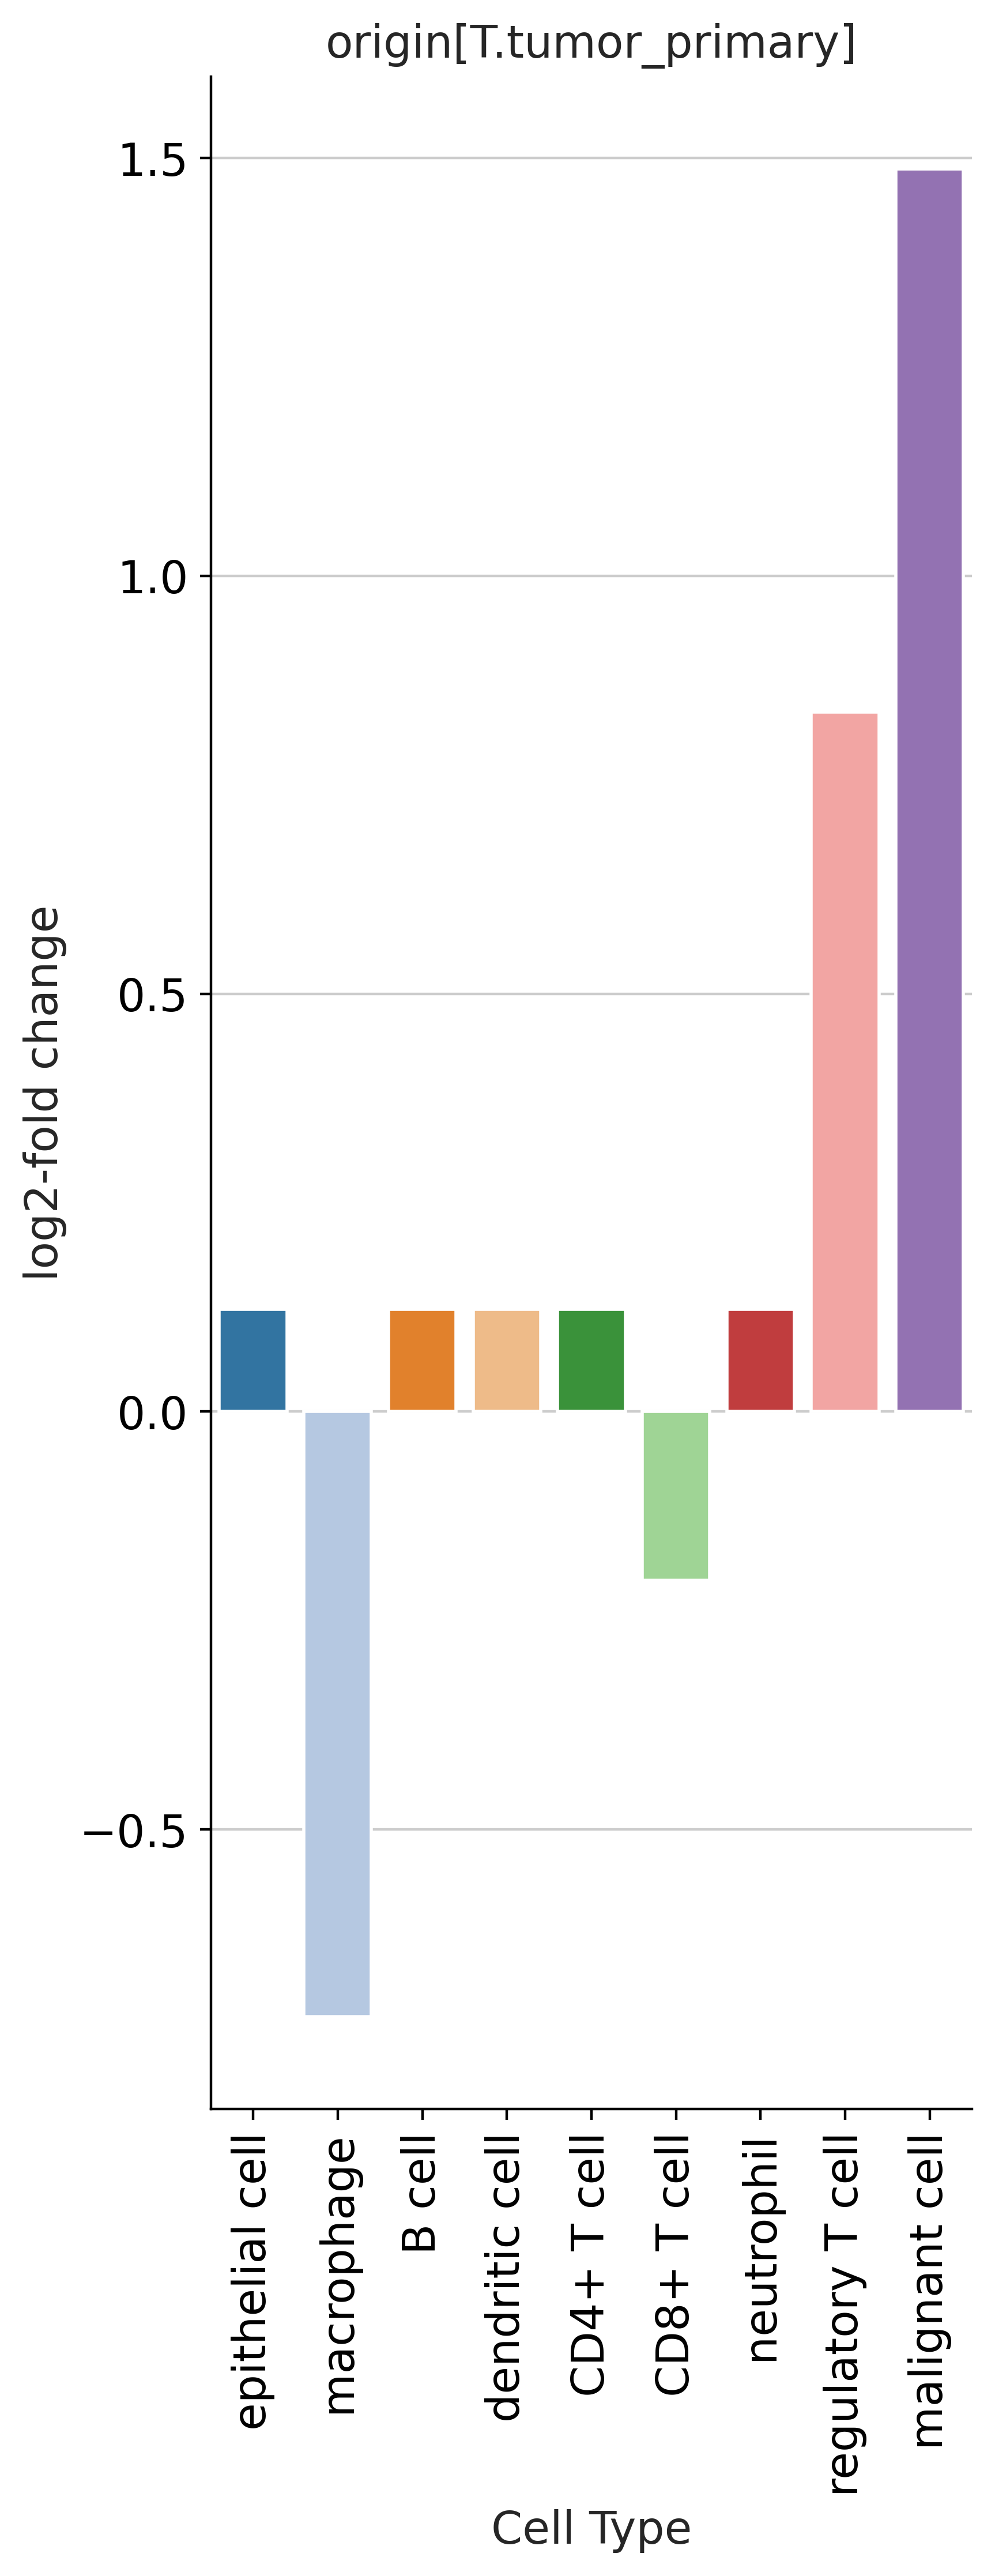

In [146]:
sccoda_model.plot_effects_barplot(sccoda_data, modality_key="coda_tumor_mvsf", parameter="log2-fold change",figsize=(10,5))

In [147]:
sccoda_model.get_effect_df(sccoda_data, modality_key="coda_tumor_mvsf")

Final Parameter  HDI 3%  HDI 97%  \
Covariate             Cell Type                                             
originT.tumor_primary epithelial cell           0.000000  -0.487    0.282   
                      macrophage               -0.586747  -0.968   -0.176   
                      B cell                    0.000000  -0.121    0.664   
                      dendritic cell            0.000000   0.000    0.000   
                      CD4+ T cell               0.000000  -0.254    0.393   
                      CD8+ T cell              -0.224880  -0.550    0.053   
                      neutrophil                0.000000  -0.416    0.374   
                      regulatory T cell         0.495220  -0.002    0.847   
                      malignant cell            0.945855   0.465    1.403   

                                            SD  Inclusion probability  \
Covariate             Cell Type                                         
originT.tumor_primary epithelial cell    0.122                 0.3163   
                      macrophage         0.231                 0.9598   
                      B cell             0.194                 0.4586   
                      dendritic cell     0.000                 0.0000   
                      CD4+ T cell        0.096                 0.2961   
                      CD8+ T cell        0.166                 0.4916   
                      neutrophil         0.121                 0.3365   
                      regulatory T cell  0.265                 0.8718   
                      malignant cell     0.250                 0.9989   

                                         Expected Sample  log2-fold change  
Covariate             Cell Type                                             
originT.tumor_primary epithelial cell          97.593502          0.122324  
                      macrophage              266.950619         -0.724174  
                      B cell                  126.445440          0.122324  
                      dendritic cell           66.607082          0.122324  
                      CD4+ T cell             625.037041          0.122324  
                      CD8+ T cell             513.849628         -0.202110  
                      neutrophil               51.563338          0.122324  
                      regulatory T cell       214.654813          0.836776  
                      malignant cell          121.591393          1.486904

In [148]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_tumor_mvsf").loc["originT.tumor_primary"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Only Male Tumor vs Normal",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

alt.Chart(...)

# Only Female Tumor vs Normal 

In [149]:
adata_luad_female = adata_luad[adata_luad.obs["sex"]=="female"]

In [150]:
adata_luad_female.obs.sex.value_counts()

sex
female    203678
Name: count, dtype: int64

In [155]:
# Convert data to mudata object
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata_luad_female,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["age","sex","dataset","origin","disease"],
)

# Select control and salmonella data as one modality
sccoda_data.mod["coda_tumor_mvsf"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["origin"].isin(["tumor_primary", "normal_adjacent"])
].copy()
print(sccoda_data)



MuData object with n_obs × n_vars = 203784 × 17820
  3 modalities
    rna:	203678 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'

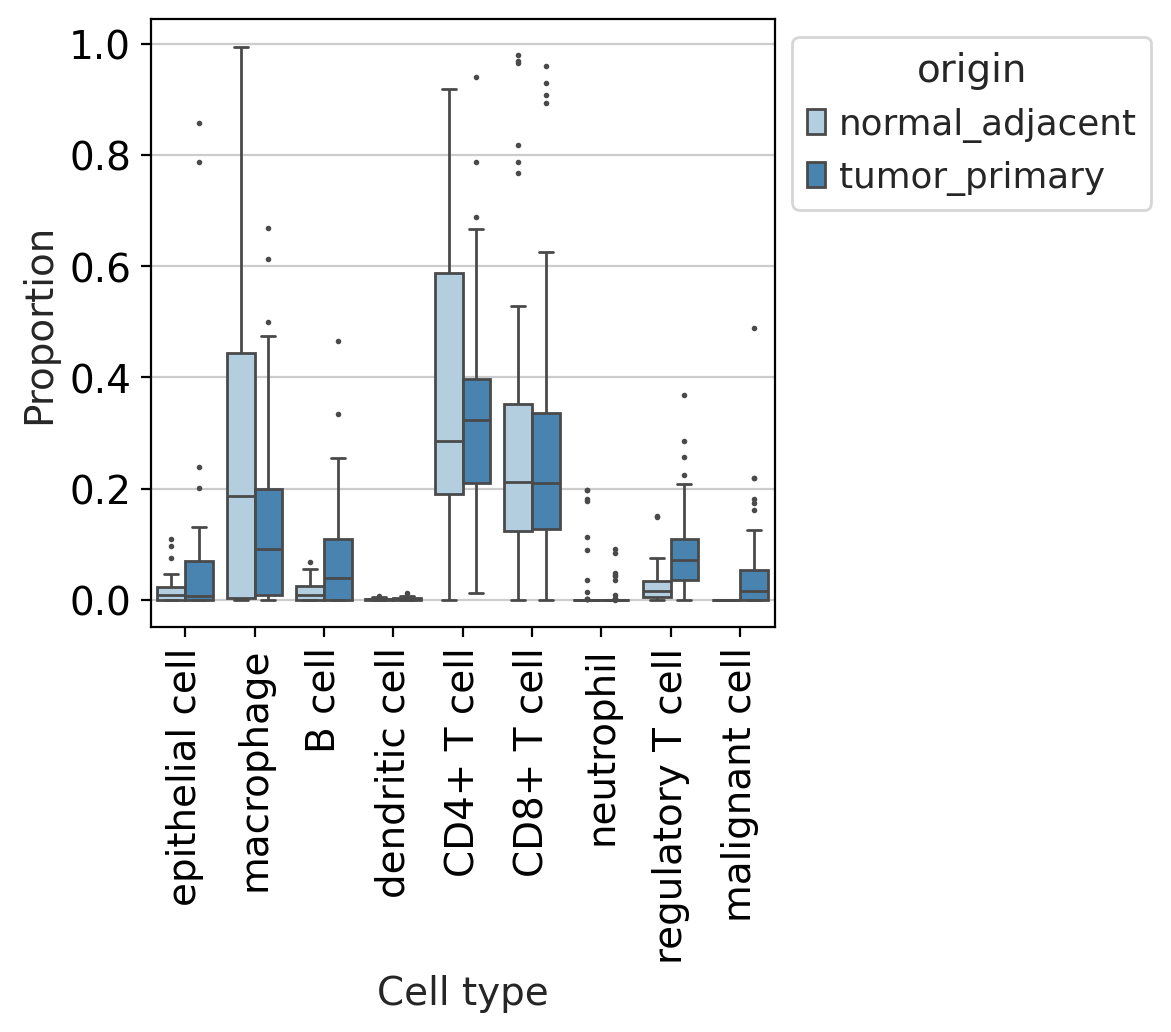

In [156]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_tumor_mvsf", feature_name="origin", add_dots=False)
plt.show()

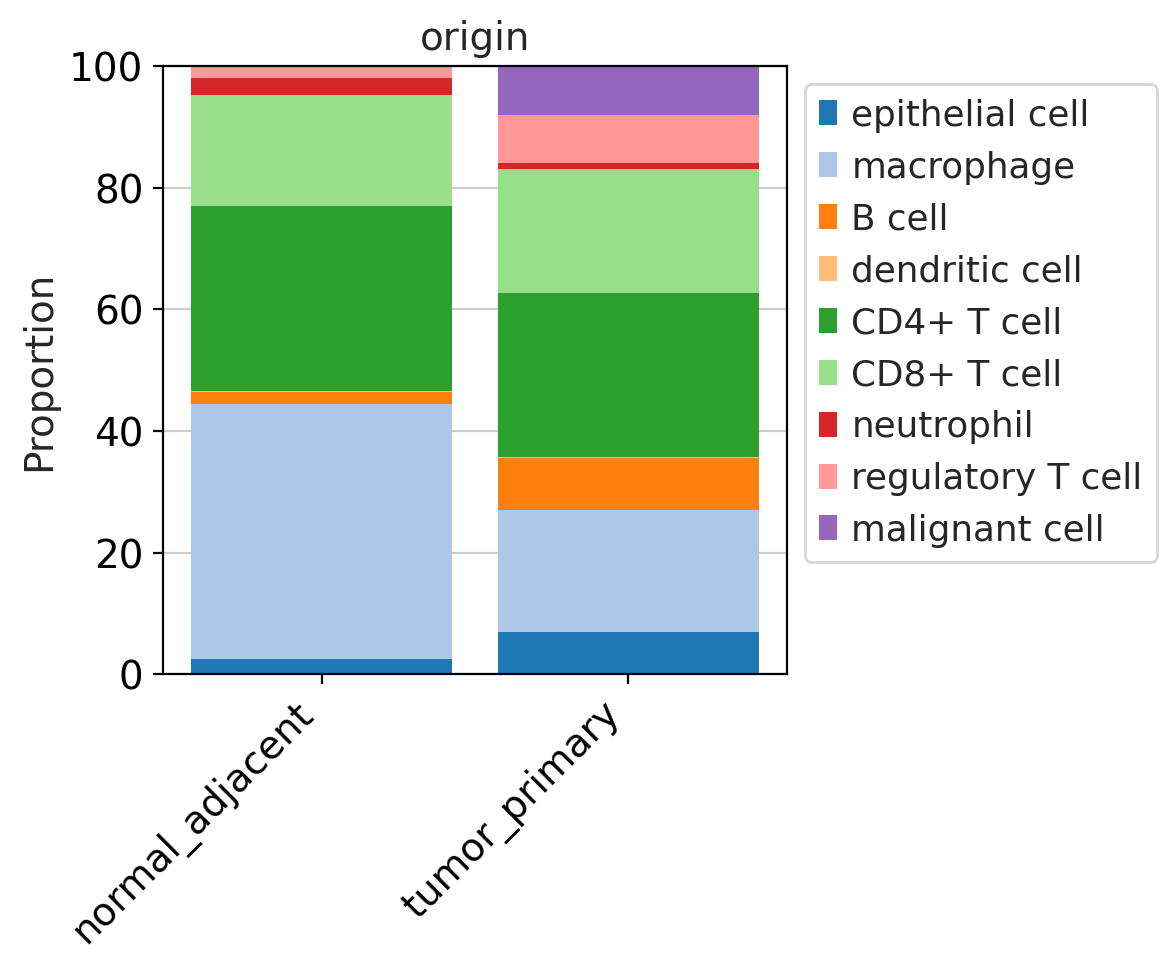

In [157]:
fig = sccoda_model.plot_stacked_barplot(
    sccoda_data,
    modality_key="coda_tumor_mvsf",
    feature_name="origin"

)

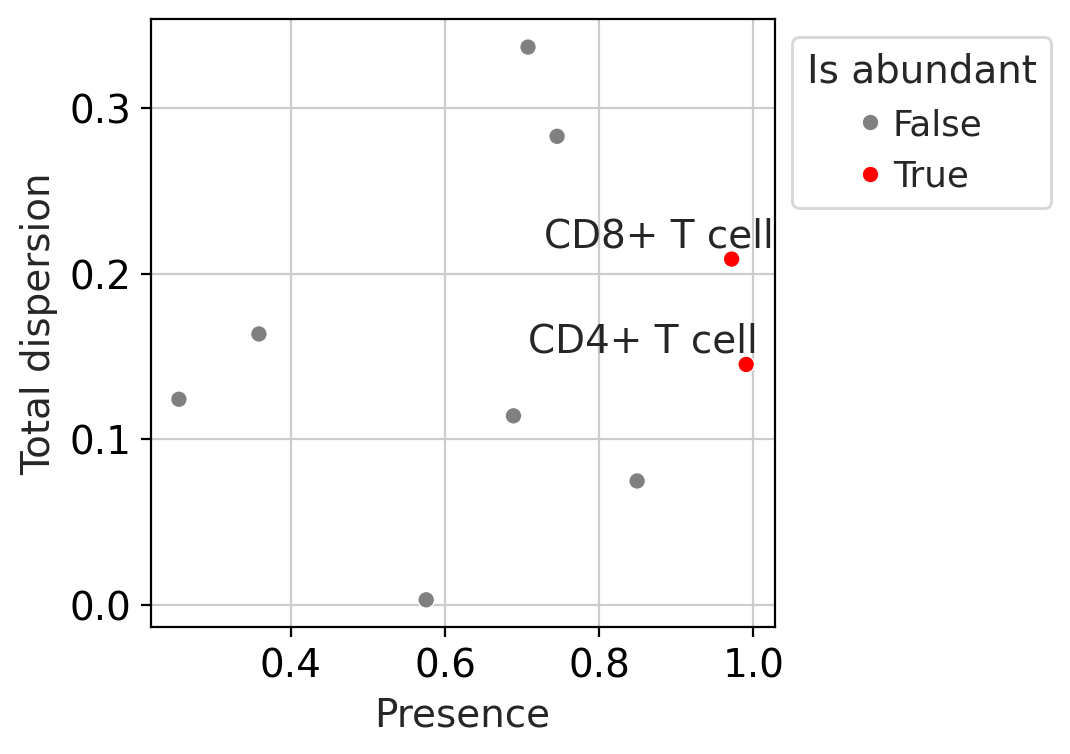

In [158]:
sccoda_model.plot_rel_abundance_dispersion_plot(sccoda_data, modality_key="coda_tumor_mvsf", abundant_threshold=0.9)

In [159]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda_tumor_mvsf",
   formula = "sex + origin",
    reference_cell_type="automatic",
    automatic_reference_absence_threshold=1
)
sccoda_data["coda_tumor_mvsf"]

• Automatic reference selection! Reference cell type set to dendritic cell
• Zero counts encountered in data! Added a pseudocount of 0.5.


AnnData object with n_obs × n_vars = 106 × 9
    obs: 'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

In [160]:
sccoda_data

MuData object with n_obs × n_vars = 203784 × 17820
  3 modalities
    rna:	203678 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	106 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
    coda_tumor_mvsf:	106 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'

In [161]:
# Run MCMC
sccoda_model.run_nuts(sccoda_data, modality_key="coda_tumor_mvsf")
sccoda_data["coda_tumor_mvsf"]

sample: 100%|██████████| 11000/11000 [06:57<00:00, 26.33it/s, 255 steps of size 2.02e-02. acc. prob=0.82]


AnnData object with n_obs × n_vars = 106 × 9
    obs: 'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_origin[T.tumor_primary]'

In [162]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda_tumor_mvsf", est_fdr=0.2)

In [163]:
sccoda_model.summary(sccoda_data, modality_key="coda_tumor_mvsf")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 106 samples, 9 cell types                                    │
│ Reference cell type                        │ dendritic cell                                                     │
│ Formula                                    │ sex + origin                                                       │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ epithelial cell        -0.989          119.063                                                                  │
│ macrophage             -0.017          314.711                                                                  │
│ B cell                 -0.993          118.588                                                                  │
│ dendritic cell         -1.480           72.868                                                                  │
│ CD4+ T cell             0.586          575.163                                                                  │
│ CD8+ T cell             0.387          471.375                                                                  │
│ neutrophil             -1.589           65.343                                                                  │
│ regulatory T cell      -0.901          130.015                                                                  │
│ malignant cell         -1.747           55.793                                                                  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          Final Parameter  Expected Sample  log2-fold change                     │
│ Covariate             Cell Type                                                                                 │
│ originT.tumor_primary epithelial cell         0.000          110.223            -0.111                          │
│                       macrophage             -0.274          221.541            -0.506                          │
│                       B cell                  0.415          166.185             0.487                          │
│                       dendritic cell          0.000           67.458            -0.111                          │
│                       CD4+ T cell             0.000          532.460            -0.111                          │
│                       CD8+ T cell             0.000          436.377            -0.111                          │
│                       neutrophil              0.000           60.492            -0.111                          │
│                       regulatory T cell       0.547          207.934             0.677                          │
│                       malignant cell          0.845          120.250             1.108                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [164]:
sccoda_model.summary(sccoda_data, modality_key="coda_tumor_mvsf", extended=True)

                                          Compositional Analysis summary                                           
┌───────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────┐
│ Name                                  │ Value                                                                   │
├───────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Data                                  │ Data: 106 samples, 9 cell types                                         │
│ Reference cell type                   │ dendritic cell                                                          │
│ Formula                               │ sex + origin                                                            │
│ Reference index                       │ 3                                                                       │
│ Spike-and-slab threshold              │ 0.603                                                                   │
│ Spike-and-slab threshold              │ 0.603                                                                   │
│ MCMC Sampling                         │ Sampled 10000 chain states (1000 burnin samples)                        │
│ Acceptance rate                       │ 81.8%                                                                   │
└───────────────────────────────────────┴─────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  HDI 3%  HDI 97%   SD   Expected Sample                                      │
│ Cell Type                                                                                                       │
│ epithelial cell        -0.989       -1.223  -0.766  0.122     119.063                                           │
│ macrophage             -0.017       -0.280   0.240  0.141     314.711                                           │
│ B cell                 -0.993       -1.267  -0.708  0.152     118.588                                           │
│ dendritic cell         -1.480       -1.670  -1.293  0.100      72.868                                           │
│ CD4+ T cell             0.586        0.384   0.795  0.110     575.163                                           │
│ CD8+ T cell             0.387        0.195   0.577  0.102     471.375                                           │
│ neutrophil             -1.589       -1.812  -1.387  0.113      65.343                                           │
│ regulatory T cell      -0.901       -1.173  -0.631  0.144     130.015                                           │
│ malignant cell         -1.747       -2.030  -1.490  0.144      55.793                                           │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          Final Parameter  Expected Sample  log2-fold change                     │
│ Covariate             Cell Type                                                                                 │
│ originT.tumor_primary epithelial cell         0.000          110.223            -0.111                          │
│                       macrophage             -0.274          221.541            -0.506                          │
│                       B cell                  0.415          166.185             0.487                          │
│                       dendritic cell          0.000           67.458            -0.111                          │
│                       CD4+ T cell             0.000          532.460            -0.111                          │
│                       CD8+ T cell             0.000          436.377            -0.111                          │
│                       neutrophil              0.000           60.492            -0.111                          │
│                       regulatory T cell       0.547          207.934             0.677                          │
│                       malignant cell          0.845          120.250             1.108                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects Extended                                                                                                │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          HDI 3%  HDI 97%   SD   Inclusion probability                           │
│ Covariate             Cell Type                                                                                 │
│ originT.tumor_primary epithelial cell    -0.171  0.481   0.129         0.376                                    │
│                       macrophage         -0.606  0.021   0.193         0.603                                    │
│                       B cell             -0.003  0.728   0.234         0.837                                    │
│                       dendritic cell      0.000  0.000   0.000         0.000                                    │
│                       CD4+ T cell        -0.088  0.463   0.129         0.415                                    │
│                       CD8+ T cell        -0.194  0.378   0.098         0.323                                    │
│                       neutrophil         -0.365  0.296   0.096         0.298                                    │
│                       regulatory T cell   0.178  0.884   0.202         0.971                                    │
│                       malignant cell      0.450  1.220   0.202         1.000                                    │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [165]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda_tumor_mvsf")

Covariate                Cell Type        
origin[T.tumor_primary]  epithelial cell      False
                         macrophage            True
                         B cell                True
                         dendritic cell       False
                         CD4+ T cell          False
                         CD8+ T cell          False
                         neutrophil           False
                         regulatory T cell     True
                         malignant cell        True
Name: Final Parameter, dtype: bool

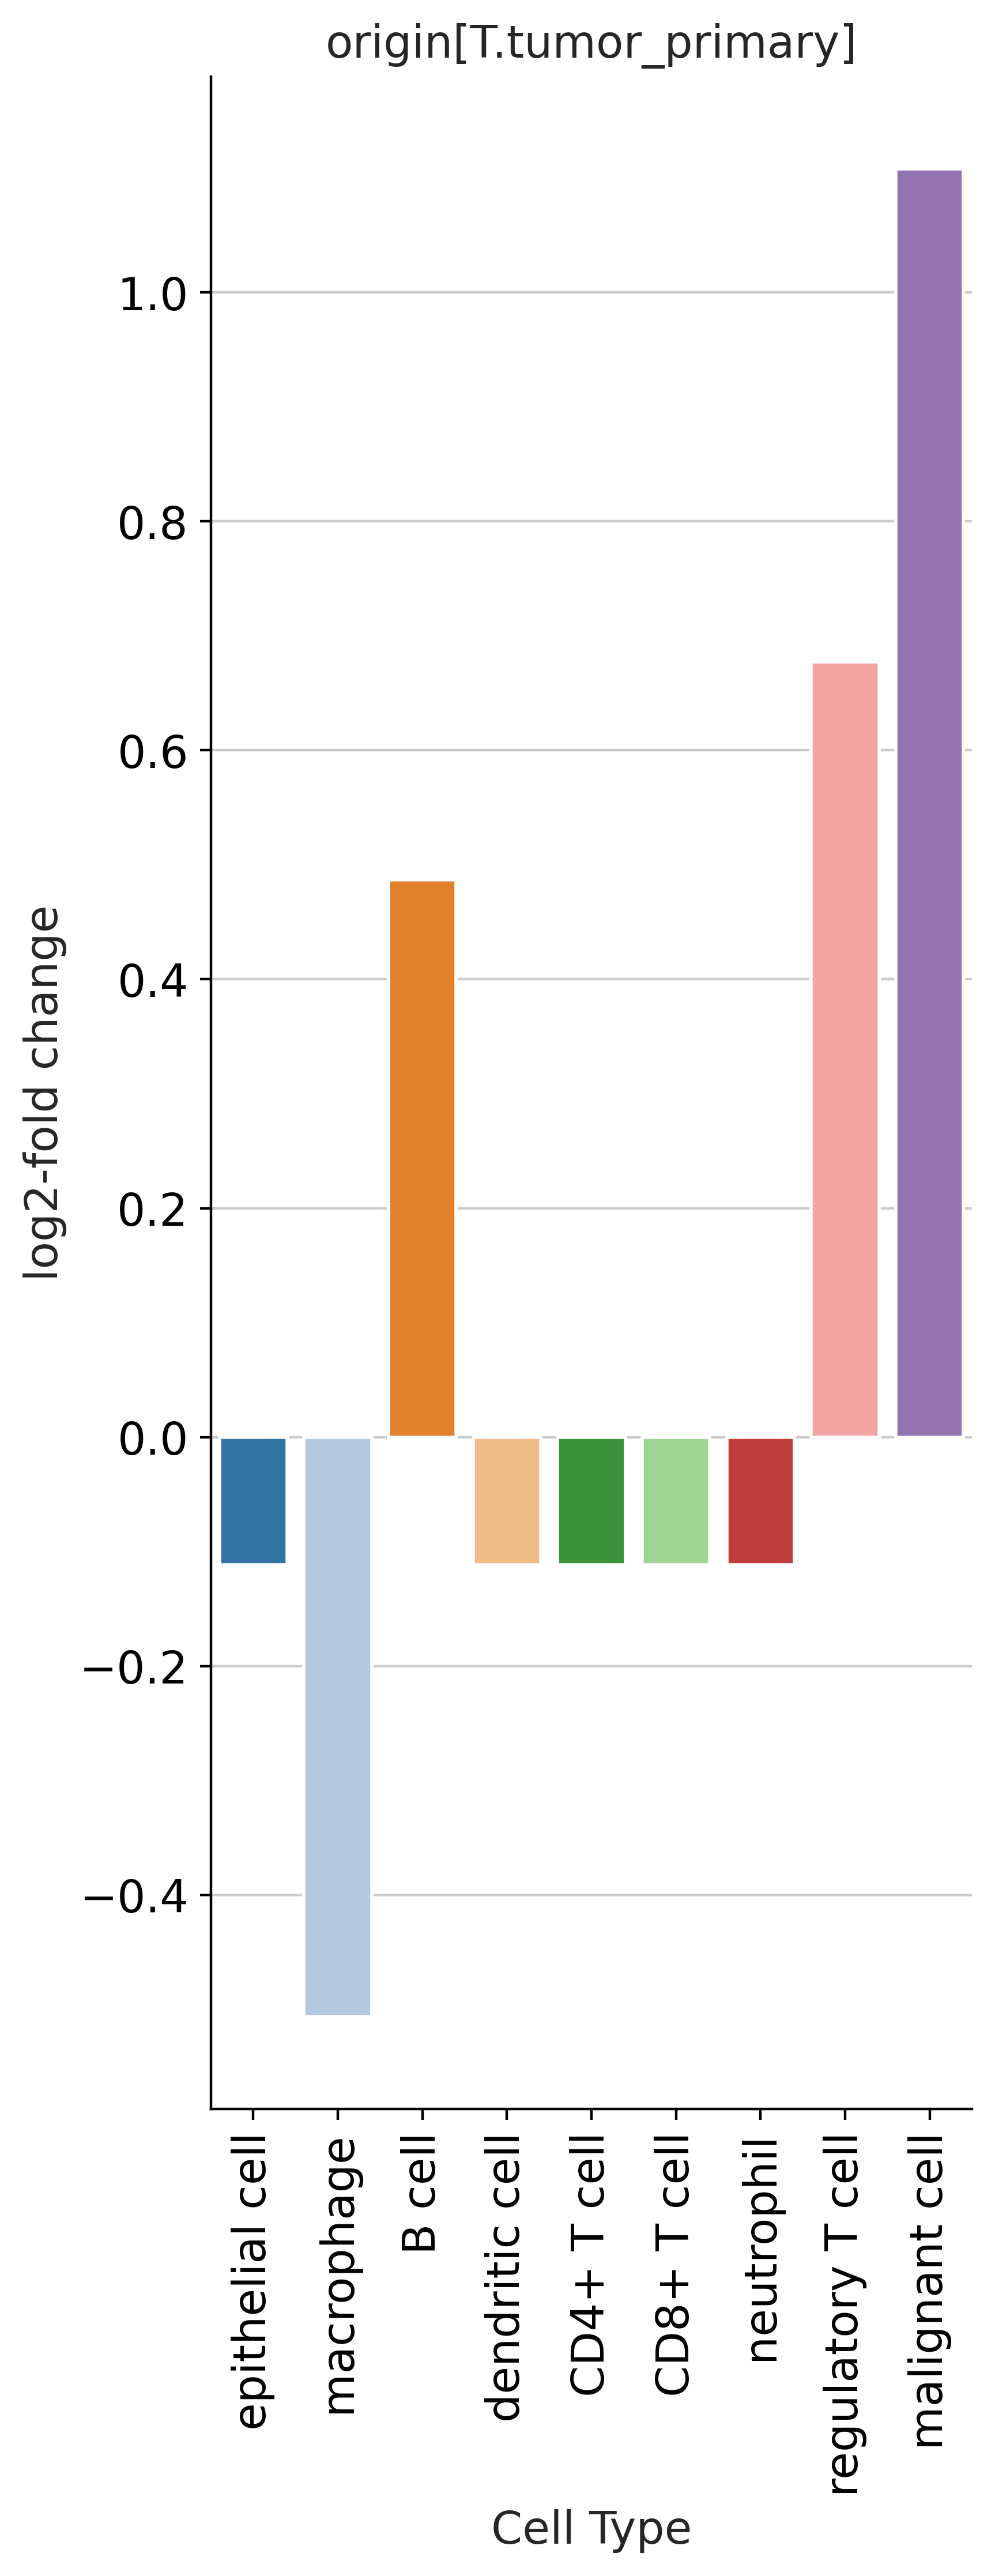

In [166]:
sccoda_model.plot_effects_barplot(sccoda_data, modality_key="coda_tumor_mvsf", parameter="log2-fold change",figsize=(10,5))

In [167]:
sccoda_model.get_effect_df(sccoda_data, modality_key="coda_tumor_mvsf")

Final Parameter  HDI 3%  HDI 97%  \
Covariate             Cell Type                                             
originT.tumor_primary epithelial cell           0.000000  -0.171    0.481   
                      macrophage               -0.273900  -0.606    0.021   
                      B cell                    0.414594  -0.003    0.728   
                      dendritic cell            0.000000   0.000    0.000   
                      CD4+ T cell               0.000000  -0.088    0.463   
                      CD8+ T cell               0.000000  -0.194    0.378   
                      neutrophil                0.000000  -0.365    0.296   
                      regulatory T cell         0.546711   0.178    0.884   
                      malignant cell            0.845061   0.450    1.220   

                                            SD  Inclusion probability  \
Covariate             Cell Type                                         
originT.tumor_primary epithelial cell    0.129                 0.3756   
                      macrophage         0.193                 0.6032   
                      B cell             0.234                 0.8365   
                      dendritic cell     0.000                 0.0000   
                      CD4+ T cell        0.129                 0.4150   
                      CD8+ T cell        0.098                 0.3233   
                      neutrophil         0.096                 0.2981   
                      regulatory T cell  0.202                 0.9710   
                      malignant cell     0.202                 1.0000   

                                         Expected Sample  log2-fold change  
Covariate             Cell Type                                             
originT.tumor_primary epithelial cell         110.223228         -0.111298  
                      macrophage              221.541035         -0.506452  
                      B cell                  166.185053          0.486835  
                      dendritic cell           67.458167         -0.111298  
                      CD4+ T cell             532.459937         -0.111298  
                      CD8+ T cell             436.377485         -0.111298  
                      neutrophil               60.491790         -0.111298  
                      regulatory T cell       207.933608          0.677439  
                      malignant cell          120.249507          1.107867

In [168]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_tumor_mvsf").loc["originT.tumor_primary"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Only Female Tumor vs Normal",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

alt.Chart(...)

In [67]:
sccoda_data

MuData object with n_obs × n_vars = 203784 × 17820
  3 modalities
    rna:	203678 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	106 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
    coda_tumor_mvsf:	106 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_origin[T.tumor_primary]'

In [68]:
sccoda_data["rna"].obs.origin.value_counts()

origin
tumor_primary      108698
normal_adjacent     94980
Name: count, dtype: int64

In [69]:
adata_luad.obs.origin.value_counts()

origin
tumor_primary      191783
normal_adjacent    157709
Name: count, dtype: int64

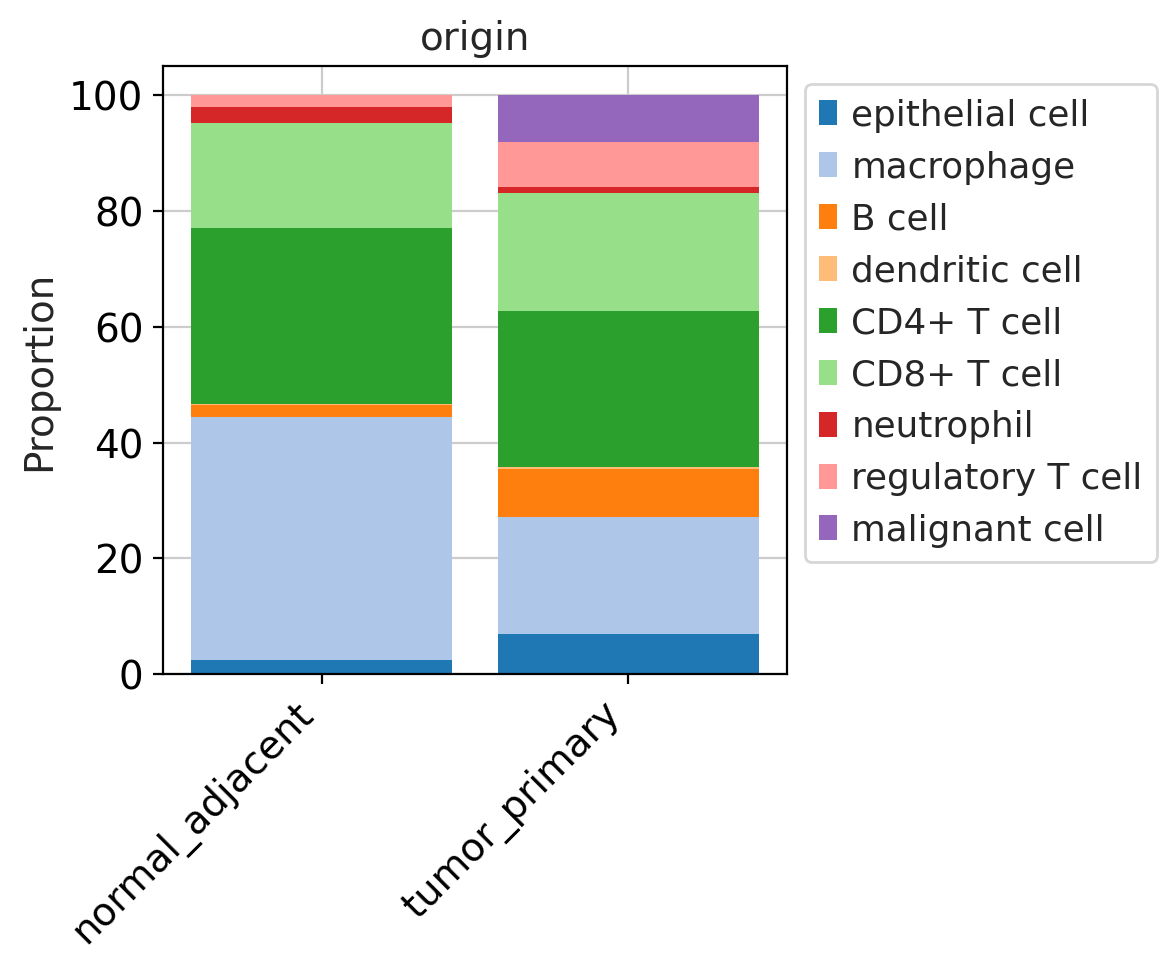

In [169]:
sccoda_model.plot_stacked_barplot(sccoda_data, modality_key="coda_tumor_mvsf", feature_name="origin")
plt.show()

# adata full Male & Female Tumor vs Normal 

In [173]:
adata.obs.origin.value_counts()

origin
tumor_primary      261494
normal_adjacent    203980
Name: count, dtype: int64

In [174]:
adata.obs.sex.value_counts()

sex
female    233953
male      231521
Name: count, dtype: int64

In [175]:
adata.obs.disease.value_counts()

disease
lung adenocarcinoma              349492
squamous cell lung carcinoma      95124
non-small cell lung carcinoma     20858
Name: count, dtype: int64

In [177]:
# Convert data to mudata object
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["age","sex","dataset","origin","disease"],
)

# Select control and salmonella data as one modality
sccoda_data_all.mod["coda_sex"] = sccoda_data_all["coda"][
    sccoda_data["coda"].obs["sex"].isin(["male", "female"])
].copy()
print(sccoda_data)



MuData object with n_obs × n_vars = 465721 × 17820
  3 modalities
    rna:	465474 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'

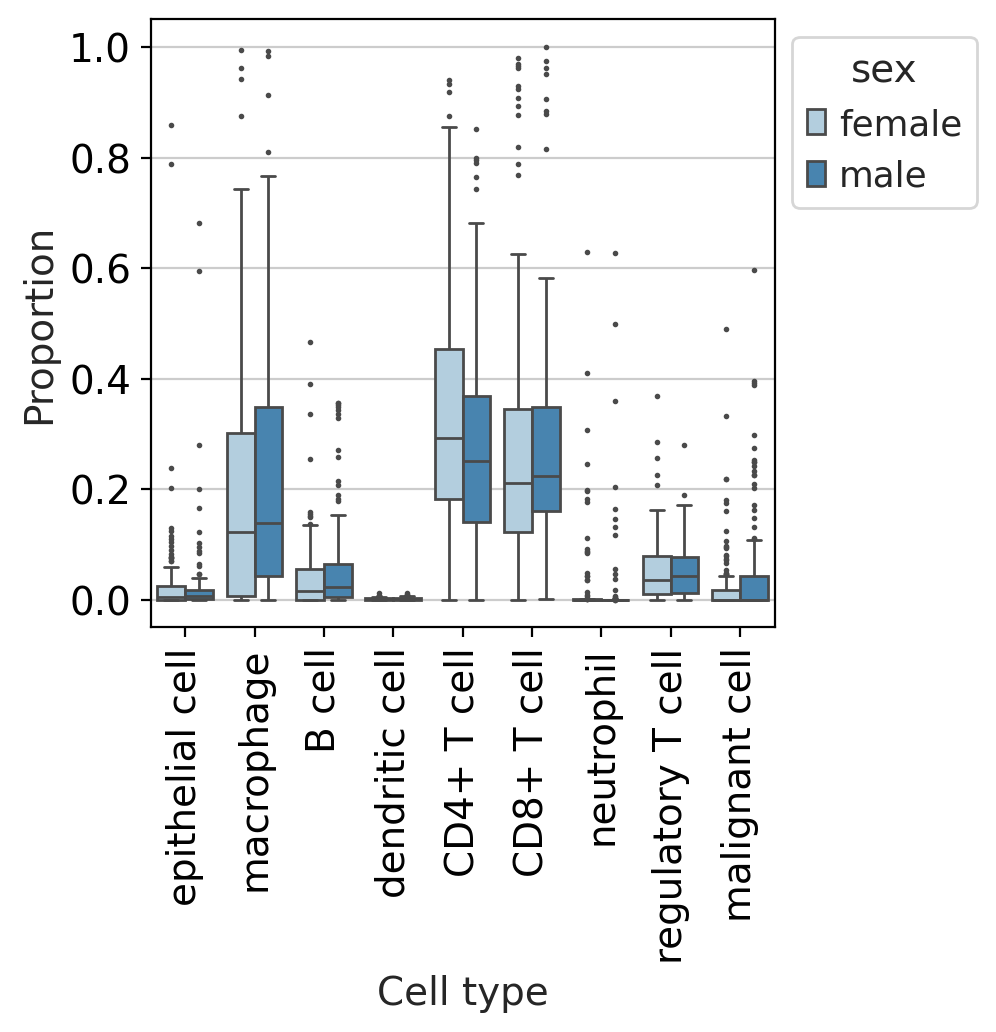

In [196]:
sccoda_model.plot_boxplots(sccoda_data_all, modality_key="coda_sex", feature_name="sex", add_dots=False)
plt.show() #luca

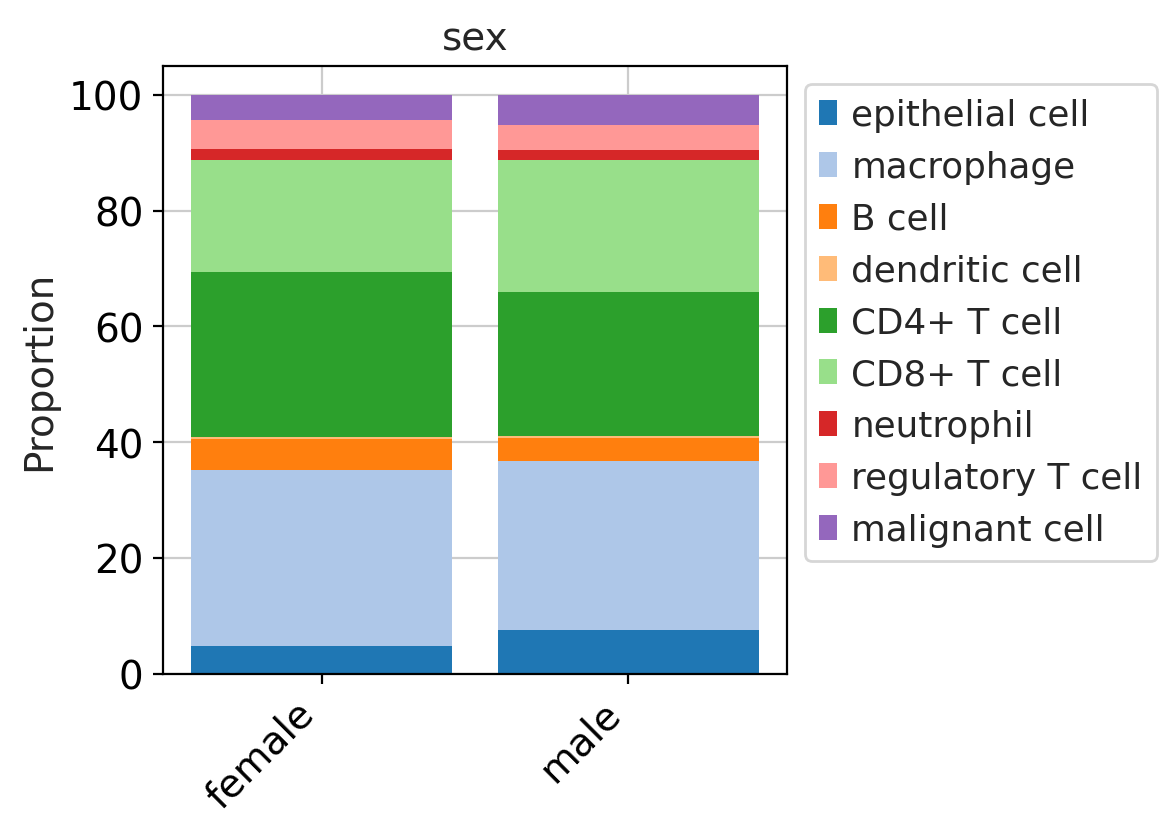

In [197]:
fig = sccoda_model.plot_stacked_barplot(
    sccoda_data,
    modality_key="coda_sex",
    feature_name="sex"

)

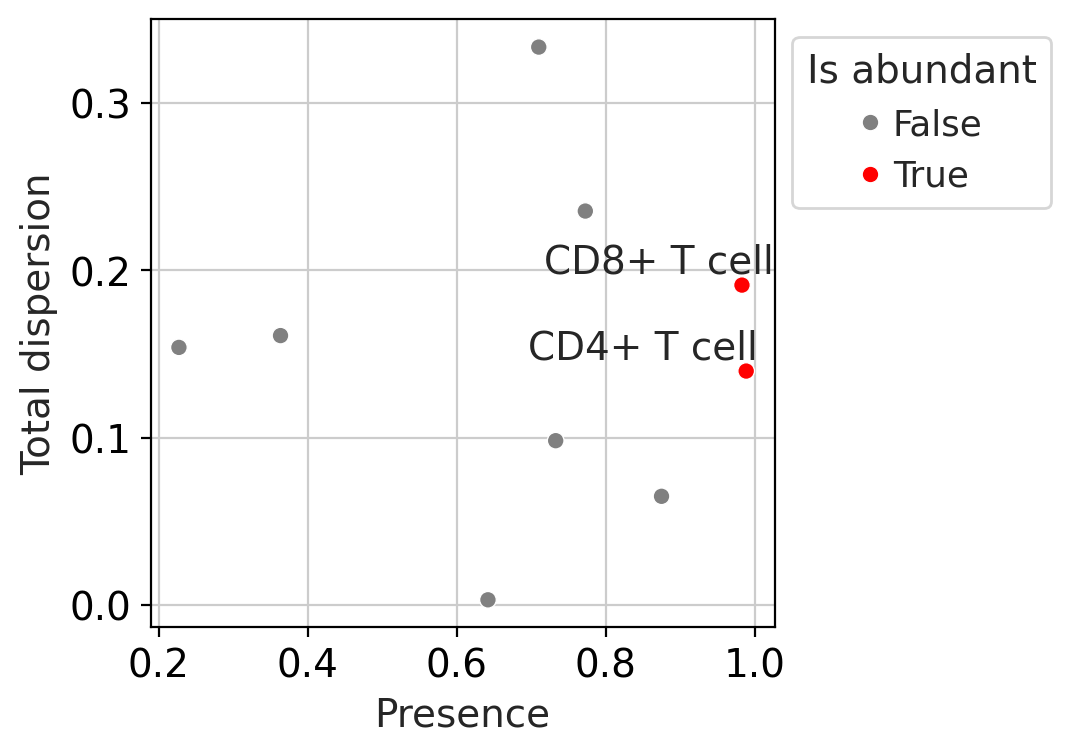

In [198]:
sccoda_model.plot_rel_abundance_dispersion_plot(sccoda_data, modality_key="coda_sex", abundant_threshold=0.9)

In [199]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda_sex",
    formula = "sex + origin + disease",
    reference_cell_type="automatic",
    automatic_reference_absence_threshold=1
)
sccoda_data["coda_sex"]

• Automatic reference selection! Reference cell type set to dendritic cell
• Zero counts encountered in data! Added a pseudocount of 0.5.


AnnData object with n_obs × n_vars = 176 × 9
    obs: 'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

In [200]:
sccoda_data

MuData object with n_obs × n_vars = 349668 × 17820
  3 modalities
    rna:	349492 x 17811
      obs:	'sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin', 'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status', 'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage', 'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation', 'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine', 'study', 'platform', 'cell_type_major', 'cell_type_neutro', 'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'scCODA_sample_id'
      var:	'is_highly_variable', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
      uns:	'_scvi', 'ann_fine_colors', 'batch_condition', 'cell_type_major_colors', 'cell_type_tumor_colors', 'dataset_colors', 'default_embedding', 'hvg', 'log1p', 'neighbors', 'origin_colors', 'platform_colors', 'schema_version', 'sex_colors', 'title', 'umap'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
      layers:	'count', 'counts_length_scaled', 'log1p_norm'
      obsp:	'connectivities', 'distances'
    coda:	176 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
    coda_sex:	176 x 9
      obs:	'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'

In [201]:
# Run MCMC
sccoda_model.run_nuts(sccoda_data, modality_key="coda_sex")
sccoda_data["coda_sex"]

sample: 100%|██████████| 11000/11000 [13:46<00:00, 13.31it/s, 255 steps of size 1.58e-02. acc. prob=0.85]


AnnData object with n_obs × n_vars = 176 × 9
    obs: 'origin', 'disease', 'sample', 'sex', 'age', 'dataset'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_sex[T.male]', 'effect_df_origin[T.tumor_primary]'

In [210]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda_sex", est_fdr=0.2)


In [211]:
sccoda_model.summary(sccoda_data, modality_key="coda_sex")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 176 samples, 9 cell types                                    │
│ Reference cell type                        │ dendritic cell                                                     │
│ Formula                                    │ sex + origin + disease                                             │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ epithelial cell        -0.980          111.782                                                                  │
│ macrophage              0.211          367.805                                                                  │
│ B cell                 -0.947          115.533                                                                  │
│ dendritic cell         -1.442           70.425                                                                  │
│ CD4+ T cell             0.681          588.486                                                                  │
│ CD8+ T cell             0.512          496.981                                                                  │
│ neutrophil             -1.603           59.953                                                                  │
│ regulatory T cell      -0.865          125.406                                                                  │
│ malignant cell         -1.770           50.732                                                                  │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          Final Parameter  Expected Sample  log2-fold change                     │
│ Covariate             Cell Type                                                                                 │
│ sexT.male             epithelial cell        -0.060           97.171            -0.202                          │
│                       macrophage              0.164          400.241             0.122                          │
│                       B cell                  0.000          106.656            -0.115                          │
│                       dendritic cell          0.000           65.014            -0.115                          │
│                       CD4+ T cell             0.000          543.269            -0.115                          │
│                       CD8+ T cell             0.194          556.802             0.164                          │
│                       neutrophil              0.000           55.346            -0.115                          │
│                       regulatory T cell       0.000          115.770            -0.115                          │
│                       malignant cell          0.000           46.834            -0.115                          │
│ originT.tumor_primary epithelial cell         0.000          106.058            -0.076                          │
│                       macrophage             -0.404          233.091            -0.658                          │
│                       B cell                  0.387          161.487             0.483                          │
│                       dendritic cell          0.000           66.819            -0.076                          │
│                       CD4+ T cell             0.000          558.352            -0.076                          │
│                       CD8+ T cell             0.000          471.533            -0.076                          │
│                       neutrophil              0.000           56.883            -0.076                          │
│                       regulatory T cell       0.562          208.698             0.735                          │
│                       malignant cell          0.948          124.181             1.291                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [212]:
sccoda_model.summary(sccoda_data, modality_key="coda_sex", extended=True)

                                          Compositional Analysis summary                                           
┌───────────────────────────────────────┬─────────────────────────────────────────────────────────────────────────┐
│ Name                                  │ Value                                                                   │
├───────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────┤
│ Data                                  │ Data: 176 samples, 9 cell types                                         │
│ Reference cell type                   │ dendritic cell                                                          │
│ Formula                               │ sex + origin + disease                                                  │
│ Reference index                       │ 3                                                                       │
│ Spike-and-slab threshold              │ 0.452                                                                   │
│ Spike-and-slab threshold              │ 0.452                                                                   │
│ MCMC Sampling                         │ Sampled 10000 chain states (1000 burnin samples)                        │
│ Acceptance rate                       │ 84.9%                                                                   │
└───────────────────────────────────────┴─────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  HDI 3%  HDI 97%   SD   Expected Sample                                      │
│ Cell Type                                                                                                       │
│ epithelial cell        -0.980       -1.155  -0.804  0.092     111.782                                           │
│ macrophage              0.211       -0.031   0.427  0.123     367.805                                           │
│ B cell                 -0.947       -1.156  -0.695  0.122     115.533                                           │
│ dendritic cell         -1.442       -1.586  -1.306  0.075      70.425                                           │
│ CD4+ T cell             0.681        0.510   0.847  0.089     588.486                                           │
│ CD8+ T cell             0.512        0.349   0.679  0.089     496.981                                           │
│ neutrophil             -1.603       -1.778  -1.432  0.091      59.953                                           │
│ regulatory T cell      -0.865       -1.074  -0.667  0.108     125.406                                           │
│ malignant cell         -1.770       -1.976  -1.547  0.115      50.732                                           │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          Final Parameter  Expected Sample  log2-fold change                     │
│ Covariate             Cell Type                                                                                 │
│ sexT.male             epithelial cell        -0.060           97.171            -0.202                          │
│                       macrophage              0.164          400.241             0.122                          │
│                       B cell                  0.000          106.656            -0.115                          │
│                       dendritic cell          0.000           65.014            -0.115                          │
│                       CD4+ T cell             0.000          543.269            -0.115                          │
│                       CD8+ T cell             0.194          556.802             0.164                          │
│                       neutrophil              0.000           55.346            -0.115                          │
│                       regulatory T cell       0.000          115.770            -0.115                          │
│                       malignant cell          0.000           46.834            -0.115                          │
│ originT.tumor_primary epithelial cell         0.000          106.058            -0.076                          │
│                       macrophage             -0.404          233.091            -0.658                          │
│                       B cell                  0.387          161.487             0.483                          │
│                       dendritic cell          0.000           66.819            -0.076                          │
│                       CD4+ T cell             0.000          558.352            -0.076                          │
│                       CD8+ T cell             0.000          471.533            -0.076                          │
│                       neutrophil              0.000           56.883            -0.076                          │
│                       regulatory T cell       0.562          208.698             0.735                          │
│                       malignant cell          0.948          124.181             1.291                          │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects Extended                                                                                                │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                          HDI 3%  HDI 97%   SD   Inclusion probability                           │
│ Covariate             Cell Type                                                                                 │
│ sexT.male             epithelial cell    -0.276   0.138  0.081         0.452                                    │
│                       macrophage         -0.060   0.421  0.138         0.642                                    │
│                       B cell             -0.165   0.234  0.067         0.406                                    │
│                       dendritic cell      0.000   0.000  0.000         0.000                                    │
│                       CD4+ T cell        -0.125   0.257  0.073         0.428                                    │
│                       CD8+ T cell        -0.024   0.428  0.141         0.768                                    │
│                       neutrophil         -0.260   0.154  0.074         0.432                                    │
│                       regulatory T cell  -0.151   0.232  0.066         0.407                                    │
│                       malignant cell     -0.185   0.214  0.067         0.414                                    │
│ originT.tumor_primary epithelial cell    -0.184   0.319  0.071         0.268                                    │
│                       macrophage         -0.661  -0.105  0.160         0.953                                    │
│                       B cell              0.074   0.669  0.181         0.909                                    │
│                       dendritic cell      0.000   0.000  0.000         0.000                                    │
│                       CD4+ T cell        -0.066   0.349  0.097         0.364                                    │
│                       CD8+ T cell        -0.205   0.206  0.050         0.214                                    │
│                       neutrophil         -0.275   0.224  0.068         0.253                                    │
│                       regulatory T cell   0.274   0.841  0.139         1.000                                    │
│                       malignant cell      0.645   1.223  0.153         1.000                                    │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [213]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda_sex")

Covariate                Cell Type        
sex[T.male]              epithelial cell       True
                         macrophage            True
                         B cell               False
                         dendritic cell       False
                         CD4+ T cell          False
                         CD8+ T cell           True
                         neutrophil           False
                         regulatory T cell    False
                         malignant cell       False
origin[T.tumor_primary]  epithelial cell      False
                         macrophage            True
                         B cell                True
                         dendritic cell       False
                         CD4+ T cell          False
                         CD8+ T cell          False
                         neutrophil           False
                         regulatory T cell     True
                         malignant cell        True
Name: Final Parameter

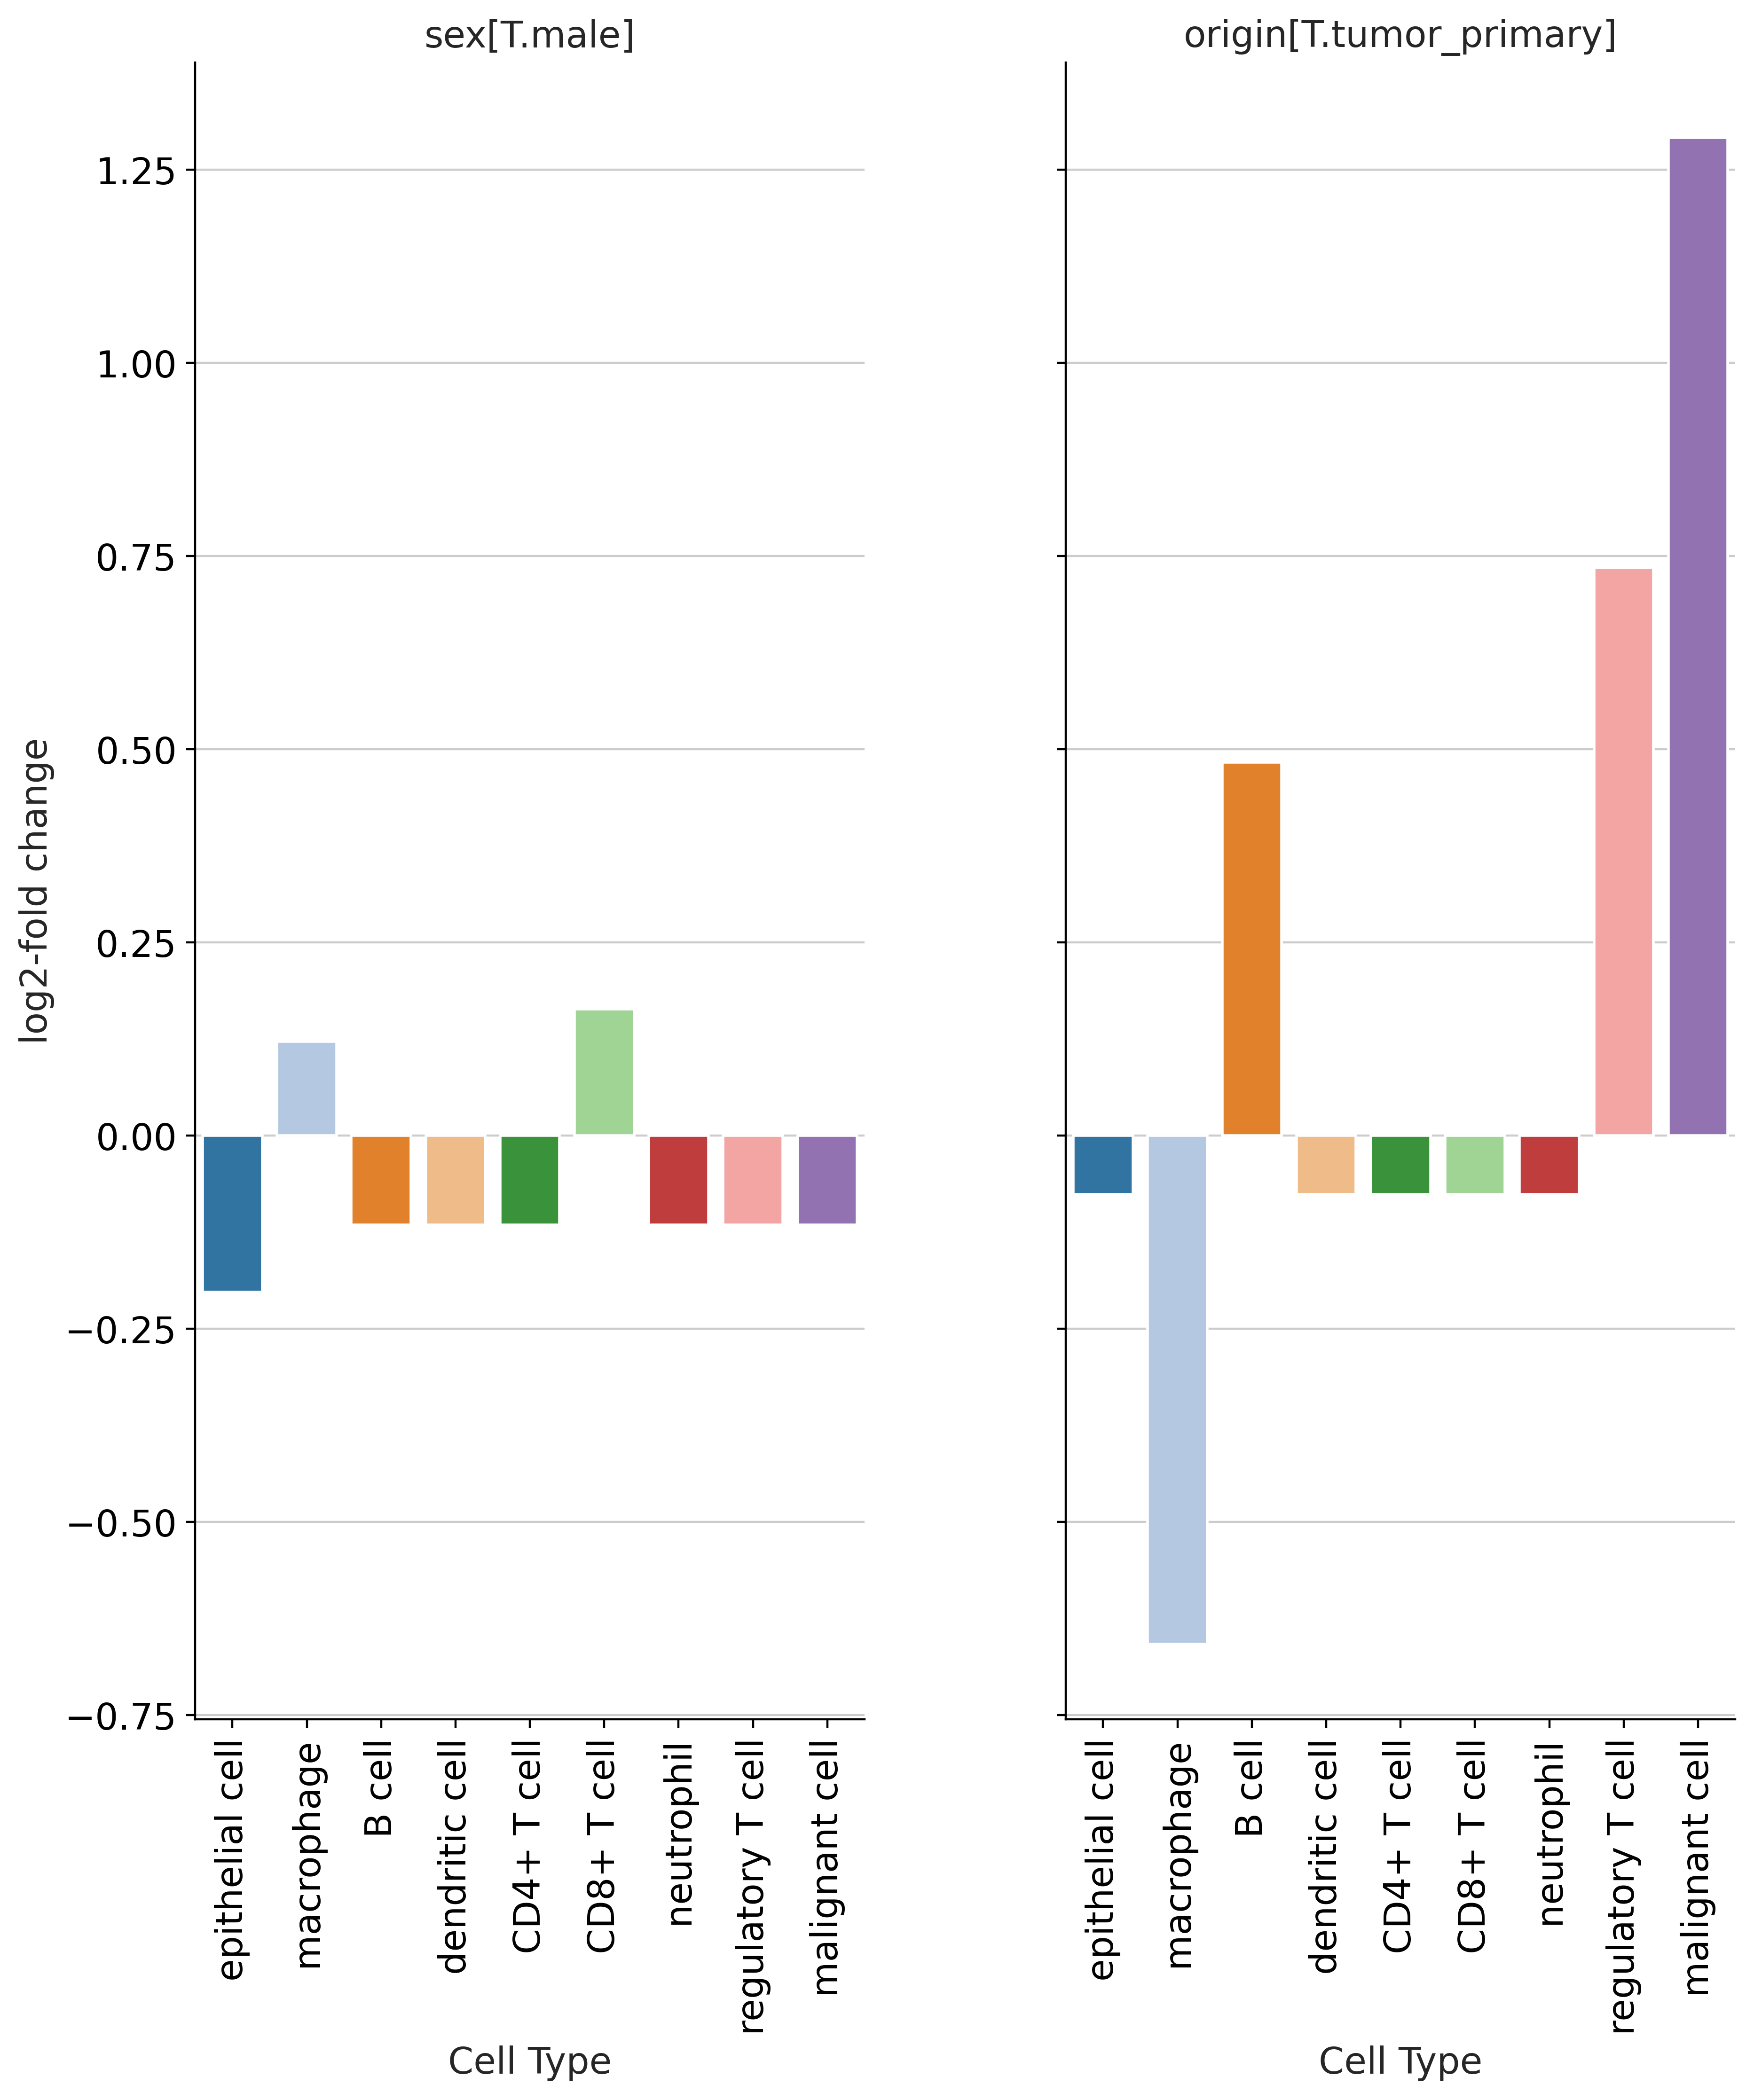

In [214]:
sccoda_model.plot_effects_barplot(sccoda_data, modality_key="coda_sex", parameter="log2-fold change",figsize=(10,5))

In [215]:
sccoda_model.get_effect_df(sccoda_data, modality_key="coda_sex")

Final Parameter  HDI 3%  HDI 97%  \
Covariate             Cell Type                                             
sexT.male             epithelial cell          -0.060135  -0.276    0.138   
                      macrophage                0.164461  -0.060    0.421   
                      B cell                    0.000000  -0.165    0.234   
                      dendritic cell            0.000000   0.000    0.000   
                      CD4+ T cell               0.000000  -0.125    0.257   
                      CD8+ T cell               0.193605  -0.024    0.428   
                      neutrophil                0.000000  -0.260    0.154   
                      regulatory T cell         0.000000  -0.151    0.232   
                      malignant cell            0.000000  -0.185    0.214   
originT.tumor_primary epithelial cell           0.000000  -0.184    0.319   
                      macrophage               -0.403562  -0.661   -0.105   
                      B cell                    0.387434   0.074    0.669   
                      dendritic cell            0.000000   0.000    0.000   
                      CD4+ T cell               0.000000  -0.066    0.349   
                      CD8+ T cell               0.000000  -0.205    0.206   
                      neutrophil                0.000000  -0.275    0.224   
                      regulatory T cell         0.561900   0.274    0.841   
                      malignant cell            0.947748   0.645    1.223   

                                            SD  Inclusion probability  \
Covariate             Cell Type                                         
sexT.male             epithelial cell    0.081                 0.4523   
                      macrophage         0.138                 0.6417   
                      B cell             0.067                 0.4056   
                      dendritic cell     0.000                 0.0000   
                      CD4+ T cell        0.073                 0.4277   
                      CD8+ T cell        0.141                 0.7680   
                      neutrophil         0.074                 0.4317   
                      regulatory T cell  0.066                 0.4075   
                      malignant cell     0.067                 0.4136   
originT.tumor_primary epithelial cell    0.071                 0.2684   
                      macrophage         0.160                 0.9531   
                      B cell             0.181                 0.9094   
                      dendritic cell     0.000                 0.0000   
                      CD4+ T cell        0.097                 0.3637   
                      CD8+ T cell        0.050                 0.2144   
                      neutrophil         0.068                 0.2532   
                      regulatory T cell  0.139                 1.0000   
                      malignant cell     0.153                 1.0000   

                                         Expected Sample  log2-fold change  
Covariate             Cell Type                                             
sexT.male             epithelial cell          97.170799         -0.202096  
                      macrophage              400.240624          0.121927  
                      B cell                  106.655607         -0.115340  
                      dendritic cell           65.014155         -0.115340  
                      CD4+ T cell             543.269230         -0.115340  
                      CD8+ T cell             556.802081          0.163972  
                      neutrophil               55.346035         -0.115340  
                      regulatory T cell       115.769948         -0.115340  
                      malignant cell           46.833793         -0.115340  
originT.tumor_primary epithelial cell         106.058405         -0.075832  
                      macrophage              233.090655         -0.658050  
                      B cell          

In [216]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_sex").loc["sexT.male"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Male vs Female",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

alt.Chart(...)

In [209]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_sex").loc["originT.tumor_primary"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Tumor vs Normal",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

alt.Chart(...)

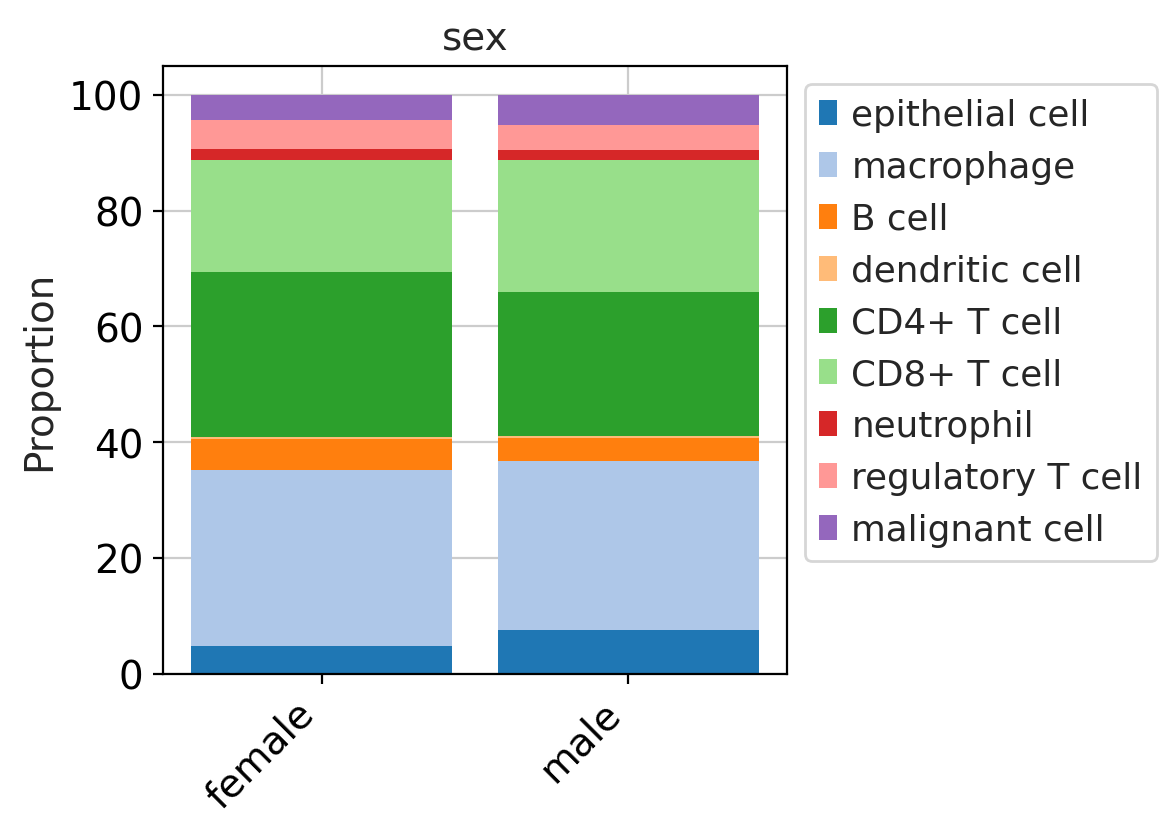

In [217]:
sccoda_model.plot_stacked_barplot(sccoda_data, modality_key="coda_sex", feature_name="sex")
plt.show()

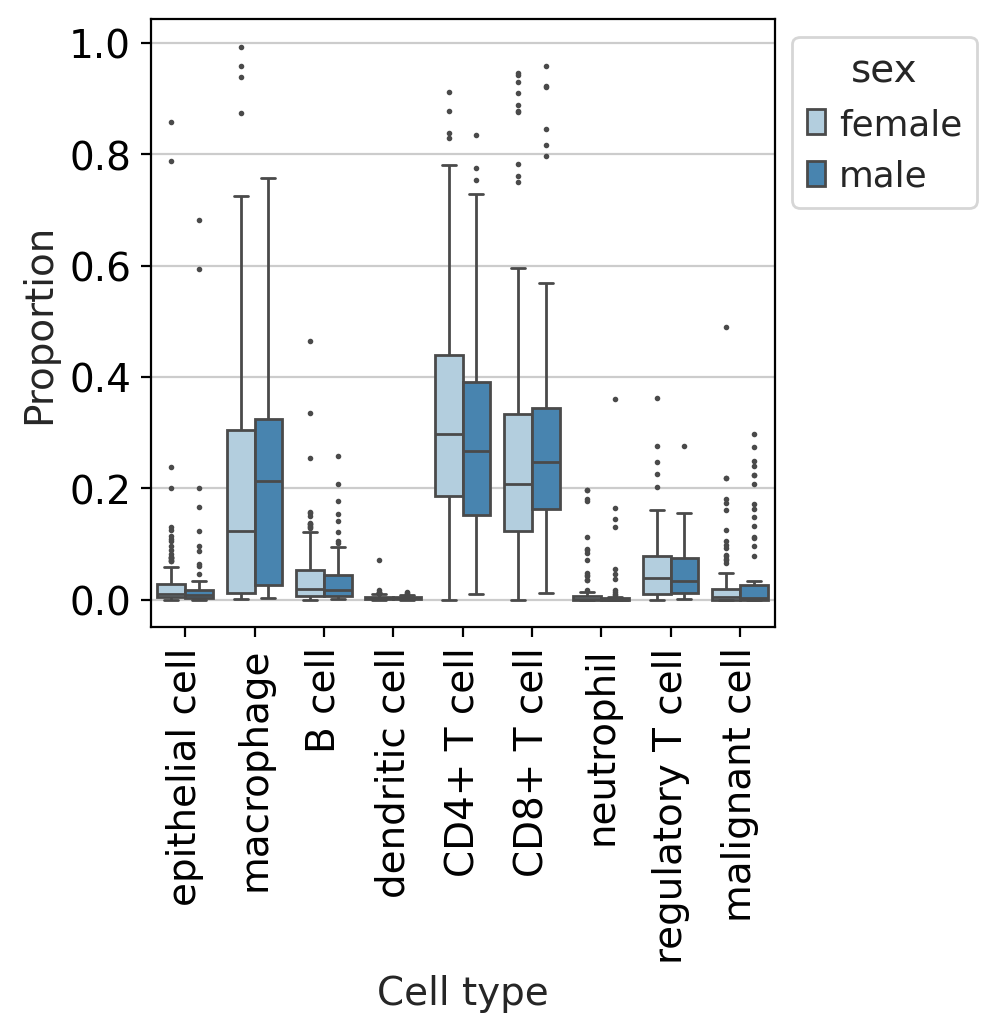

In [218]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_sex", feature_name="sex", add_dots=False)
plt.show()

In [ ]:
adata_male = adata[adata.obs["sex"]=="male"]

In [ ]:
# Convert data to mudata object
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata_male,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["age","sex","dataset","origin"],
)

# Select control and salmonella data as one modality
sccoda_data.mod["coda_male_origin"] = sccoda_data["coda"][
    sccoda_data["coda"].obs["origin"].isin(["tumor_primary", "normal_adjacent"])
].copy()
print(sccoda_data)



In [ ]:
sccoda_model.plot_boxplots(sccoda_data, modality_key="coda_male_origin", feature_name="origin", add_dots=False)
plt.show()

In [ ]:
fig = sccoda_model.plot_stacked_barplot(
    sccoda_data,
    modality_key="coda_male_origin",
    feature_name="origin"

)

In [ ]:
sccoda_model.plot_rel_abundance_dispersion_plot(sccoda_data, modality_key="coda_male_origin", abundant_threshold=0.9)

In [ ]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda_male_origin",
    formula = "origin",
    reference_cell_type="automatic",
    automatic_reference_absence_threshold=1
)
sccoda_data["coda_male_origin"]

In [ ]:
sccoda_data

In [ ]:
# Run MCMC
sccoda_model.run_nuts(sccoda_data, modality_key="coda_male_origin")
sccoda_data["coda_male_origin"]

In [ ]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda_male_origin", est_fdr=0.1)


In [ ]:
sccoda_model.summary(sccoda_data, modality_key="coda_male_origin")

In [ ]:
sccoda_model.summary(sccoda_data, modality_key="coda_male_origin", extended=True)

In [ ]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda_male_origin")

In [ ]:
sccoda_model.plot_effects_barplot(sccoda_data, modality_key="coda_male_origin", parameter="log2-fold change",figsize=(10,5))

In [ ]:
sccoda_model.get_effect_df(sccoda_data, modality_key="coda_male_origin")

In [ ]:
alt.Chart(sccoda_model.get_effect_df(sccoda_data, modality_key="coda_male_origin").loc["originT.tumor_primary"]
    #.loc[credible_effects_condition]
    .reset_index(),
    title="Only Male Tumor vs Normal",
).mark_bar().encode(
    x="log2-fold change",
    y=alt.X("Cell Type", sort="y"),
    color=alt.Color("Cell Type"),
)

In [ ]:
sccoda_model.plot_stacked_barplot(sccoda_data, modality_key="coda_male_origin", feature_name="origin")
plt.show()